<div class="usecase-title">Enhancing Pedestrian Safety in Melbourne's Urban Areas</div>

<div class="usecase-authors"><b>Authored by: </b> Dinuk</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, Machine Learning }</div>
</div>

As a Data Science Student,
I want to analyze traffic and pedestrian d,t,a including weather conditions and specific location detals,

So that I can identify patterns and factors contributing to pedeian strtraf.
Also, I can enhance safety and implement effective measures to enhance ng walkiconditions.n
se
Acceptance Criteria:

Data Collection and Integration:
The system should be able to integrate data from various so, including weather conditions (temperature, UV index, rainfall), pedestrian counts, and specific geographic locationsocati.
Collect and integrate detailed topographical data to assess the steepness of pedestrian patys.ns.
Data shouupdatedpover dafor the past monthshstime to ensure decisions are made based on the most current informavailableil
a
le.
Data Analysis and Reporting:
Implement a regression analysis model to understand how different factors like weather conditions and specific locations impact pedestrian safety.
Use correlation matrices to identify highly correlated variables that may impact the effectiveness of the regression model andmulticollinearity.lticollin
Implement algorithms to calculate the safest and most efficient pathways that minimize steepness and exposure to potential hazards.

Route Optimization and Mapping:
Use GIS (Geographic Information Systems) technology to map out routes that optimize safety based on model findings.
Provide alternative routes that balance steepness with other environmental and urban factors, giving pedestrians options baser personal preferences or c.

s
.earity.
Model Optimization:
Employ dimensionality reduction techniques such as PCA to manage high-dimeefficiency. Regularization methods like Ridge or Lasso should be incorporated, or Lasso should  or Lasso to handle multicollinearity and improve model performance.
Develop a feature selection strategy to eliminate redundant or irrelevant features based on their correlation and i act on mo
del
 accuracy.
Visualization and Decision Support:
Provide a visualization dashboard that displays traffic and pedestrian safety metrics across different times and locations.
The dashboard should include heatmaps or other approprihighlightingools to highlight key correlations and trends.
Support decisions on where to implement safety measures such as improved signage, pedestrian paths, or traffi.g measures based o
Create an interactive map or application that allows users to input their starting point and destination and receive recommendations for atdhesafest routes.
n m
odel insights.
Feedback and Iteration:
The system should support feedback loops where outcomes of implemented mesures are monitored, and data is re-analyzed to measure effectiveness.
Continuous refinement of models and strategies banalysis.
d on ongoing data ana
Technical Notes:
Ensure data privacy and security, especially with real-time data integration.
Consider the scalability of the data processing infrastructure to handle increastimeata volumer times.

Ensure that the steepness data is accurate and regularly updated to reflect current pathway conditions.
Consider the accessibility needs of all users, including those with disabilities, ensuring that the routes suggested are universally accessible.
Develop thewith scalability in mind to accommodaincrease the nal factors ocrease ana user base in the f.lysis and feedback.
 it.

At the end of this use case, I will have demonstrated a broad range of skills essential for data-driven urban planning and public safety enhancement. These include Data Integration, where I'll show the ability to merge and utilise data from diverse sources such as weather conditions, pedestrian counts, and geographic specifics in real-time or near-real-time. In Statistical Analysis and Modeling, I'll apply statistical techniques and regression models to dissect the impact of various environmental and urban factors on pedestrian safety, tackling issues like multicollinearity and data dimensionality using methods like PCA and regularisation.

M  work in Geospatial Analysis willhighlight hm  proficiency with GIS technology, enabling you to assess andoptimisee pedestrian routes based on topographical data like route steepness. In the realm of Machine Learning and Predictive ModelingIou'll refine predictive models to anticipate pedestrian traffic patterns and identify risk factors, enhancing model accuracy through careful feature selection.

Software Development skills will come into pyin developing interactive applications that advise users on safe pedestrian routes, integrating complex backend analytics with user-friendly interfaces. My focus on User-Centric Design and Feedback processes ensuresrat these tools are accessible and practical, incorporating user feedback for continuous improvemen

Promanagement and collaboration skills will be crucial to coordinating with stakeholders, including government bodies and public safety organisations, and ons, effectively communicating technical findings to inform and shape polFinallyFinMy, your understanding of Ethical and Privacy Considerations ensures that all data handling is conducted with the utmost respect for privacy and compliance with legal standards, establishing solutions that are not only effective but also ethically sound and securndards.

<div class="usecase-section-header">Introduction or background relating to problem</div>

In modern urban environments, pedestrian safety is a crucial concern for city planners and public officials. As cities grow and traffic increases, the challenge of ensuring safe and accessible pedestrian pathways becomes increasingly complex. Addressing this issue requires a comprehensive understanding of the various factors that influence pedestrian safety, including geographic features, traffic patterns, and environmental conditions such as weather.

The use of data-driven approaches to urban planning offers a powerful tool to enhance pedestrian safety. By integrating and analyzing data from diverse sources—such as weather stations for real-time weather conditions, traffic sensors for vehicle and pedestrian counts, and GIS data for detailed geographic and topographical information—planners can identify high-risk areas, predict potential safety issues, and implement effective interventions.



## Packages

This code snippet sets up the necessary libraries and configurations for my project on analyzing pedestrian safety data. It includes tools for data manipulation, visualization, and statistical analysis. I also configure caching for my data requests to enhance performance and set up environment variables to manage sensitive data securely.

In [310]:
import datetime
import os
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import requests_cache
import openmeteo_requests
import json
import geopandas as gpd
import seaborn as sns
import statsmodels.api as sm
from dotenv import load_dotenv
from folium.plugins import HeatMap
from IPython.display import HTML
from io import StringIO
from ipywidgets import interact, widgets
from retry_requests import retry
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from shapely.geometry import shape
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster
import networkx as nx
from scipy.spatial.distance import euclidean


# Load environment variables
load_dotenv()

# Set up requests cache
requests_cache.install_cache()


## Footpath Steepness dataset

In this snippet, I'm utilizing environment variables to securely access an API key and fetch data regarding footpath steepness from an open data platform. I use a GET request to retrieve the data in CSV format, then load it into a pandas DataFrame for analysis. This approach ensures that my data analysis is based on the most current information available, aligning with my project's requirements to enhance pedestrian safety through informed decision-making.

In [311]:

load_dotenv()
api_key = os.environ.get("API_KEY_MOP")

base_url = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'
dataset_id = 'footpath-steepness'
apikey = api_key
dataset_id = dataset_id
format = 'csv'

params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}
url = f'{base_url}{dataset_id}/exports/{format}'
#GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    footpath_steepness = pd.read_csv(StringIO(url_content), delimiter=';')
    print(footpath_steepness.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')



                                  geo_point_2d  \
6939   -37.834184443532315, 144.98342979121114   
5502   -37.826686836876966, 144.97103418420872   
3964    -37.82336149873195, 144.96754168744584   
2188     -37.79942098354816, 144.9709189315643   
18168    -37.8123192032331, 144.94489016390477   
22798    -37.80130971831834, 144.9497764914157   
25768  -37.816754619197326, 144.96017246206142   
29434    -37.81344984270297, 144.9542095491507   
1798     -37.8009149408176, 144.96210417505176   
25796   -37.81592870791109, 144.94519341481032   

                                               geo_shape  grade1in  gradepc  \
6939   {"coordinates": [[[[144.98343176752343, -37.83...       NaN      NaN   
5502   {"coordinates": [[[[144.9710361192438, -37.826...      96.2     1.04   
3964   {"coordinates": [[[[144.96751421509197, -37.82...      45.0     2.22   
2188   {"coordinates": [[[[144.9712146619255, -37.799...      53.7     1.86   
18168  {"coordinates": [[[[144.94488685091872, -37.81.

In [312]:
footpath_steepness


,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance
0,"-37.823036142583945, 144.94866061456034","{""coordinates"": [[[[144.94865791889143, -37.82...",4.2,23.81,NaN,8.0,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43
1,"-37.79542957518662, 144.91714933764632","{""coordinates"": [[[[144.9171360775573, -37.795...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1534622,NaN,NaN,NaN,NaN
2,"-37.79544286753349, 144.9172426574227","{""coordinates"": [[[[144.917238930522, -37.7954...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1534622,NaN,NaN,NaN,NaN
3,"-37.79580169415494, 144.92075182140118","{""coordinates"": [[[144.92074176246658, -37.795...",35.1,2.85,NaN,NaN,Road Footway,0.23,NaN,NaN,1387592,NaN,2.78,2.55,8.07
4,"-37.79654832375531, 144.92328274904054","{""coordinates"": [[[[144.92328246984576, -37.79...",109.6,0.91,NaN,NaN,Road Footway,0.01,NaN,NaN,1387085,NaN,3.39,3.38,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33580,"-37.80166668168155, 144.94353746774505","{""coordinates"": [[[[144.94350389586447, -37.80...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1385182,NaN,NaN,NaN,NaN
33581,"-37.80169795826924, 144.9433029188373","{""coordinates"": [[[[144.9433008833934, -37.801...",NaN,NaN,NaN,4.0,Road Footway,NaN,2987.0,30333.0,1385189,Pl5230,NaN,NaN,NaN
33582,"-37.802241487751616, 144.9434698881252",NaN,23.3,4.30,NaN,NaN,Road Footway,2.20,NaN,NaN,1385334,NaN,15.15,12.95,51.21
33583,"-37.8024821678599, 144.94316039147643","{""coordinates"": [[[[144.94311328357037, -37.80...",20.2,4.94,NaN,NaN,Road Footway,1.00,NaN,NaN,1385191,NaN,15.95,14.95,20.25


## Pedestrian monthly Counts per hour dataset

In this snippet, I retrieve hourly pedestrian count data from an API, which I then load into a pandas DataFrame for processing. This data is crucial for analysing pedestrian traffic patterns. I ensure the completeness of the time series by filling in any missing timestamps and replacing missing data with zeros. This preparation is essential for accurate analysis and modelling in my project aimed at enhancing pedestrian safety.

In [313]:

load_dotenv()
api_key = os.environ.get("API_KEY_MOP")

base_url = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'
dataset_id = 'pedestrian-counting-system-monthly-counts-per-hour'
apikey = api_key
dataset_id = dataset_id
format = 'csv'

params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}
url = f'{base_url}{dataset_id}/exports/{format}'
# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian_count = pd.read_csv(StringIO(url_content), delimiter=';')

    pedestrian_count['timestamp'] = pd.to_datetime(pedestrian_count['timestamp'])
    all_hours = pd.date_range(start=pedestrian_count['timestamp'].min(), end=pedestrian_count['timestamp'].max(), freq='1H')
    all_hours_df = pd.DataFrame({'timestamp': all_hours})
    
    # Merge with original DataFrame to fill in missing rows
    pedestrian_count = pd.merge(all_hours_df, pedestrian_count, on='timestamp', how='left')
    
    # Fill NaN values with 0
    pedestrian_count.fillna(0, inplace=True)
    
    print(pedestrian_count)

    print(pedestrian_count.sample(10, random_state=999)) # Test
    
else:
    print(f'Request failed with status code {response.status_code}')

                       timestamp sensor_name  locationid  direction_1  \
0      2023-03-31 13:00:00+00:00       QVN_T        66.0        220.0   
1      2023-03-31 13:00:00+00:00    FLDegS_T        67.0         64.0   
2      2023-03-31 13:00:00+00:00    SprFli_T        75.0          5.0   
3      2023-03-31 13:00:00+00:00    HarEsP_T        77.0         25.0   
4      2023-03-31 13:00:00+00:00    HarEsB_T        78.0          3.0   
...                          ...         ...         ...          ...   
550930 2024-03-18 14:00:00+00:00   Fli114F_T       117.0          6.0   
550931 2024-03-18 14:00:00+00:00     King2_T       131.0         19.0   
550932 2024-03-18 14:00:00+00:00   Spen229_T       133.0         24.0   
550933 2024-03-18 14:00:00+00:00   Spen201_T       134.0         19.0   
550934 2024-03-18 14:00:00+00:00   Spen161_T       135.0         10.0   

        direction_2  total_of_directions                    location  
0             227.0                447.0  -37.810578

In [314]:
all_hours

DatetimeIndex(['2023-03-31 13:00:00+00:00', '2023-03-31 14:00:00+00:00',
               '2023-03-31 15:00:00+00:00', '2023-03-31 16:00:00+00:00',
               '2023-03-31 17:00:00+00:00', '2023-03-31 18:00:00+00:00',
               '2023-03-31 19:00:00+00:00', '2023-03-31 20:00:00+00:00',
               '2023-03-31 21:00:00+00:00', '2023-03-31 22:00:00+00:00',
               ...
               '2024-03-18 05:00:00+00:00', '2024-03-18 06:00:00+00:00',
               '2024-03-18 07:00:00+00:00', '2024-03-18 08:00:00+00:00',
               '2024-03-18 09:00:00+00:00', '2024-03-18 10:00:00+00:00',
               '2024-03-18 11:00:00+00:00', '2024-03-18 12:00:00+00:00',
               '2024-03-18 13:00:00+00:00', '2024-03-18 14:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=8474, freq='H')

In [315]:
zero_count = (pedestrian_count == 0).sum()
zero_count

timestamp                  0
sensor_name              959
locationid               959
direction_1            11404
direction_2            11175
total_of_directions      959
location                 959
dtype: int64

## Pedestrian Couting System Locations dataset

In this code snippet, I access pedestrian sensor location data from an open data API to enhance my analysis of pedestrian traffic patterns. After successfully fetching the data, I convert it into a pandas DataFrame to facilitate further analysis, such as mapping sensor locations using GIS technology. This process is critical for accurately determining the distribution of pedestrian traffic and planning safety measures effectively in my data-driven urban planning project.

In [316]:

load_dotenv()
api_key = os.environ.get("API_KEY_MOP")

base_url = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'
dataset_id = 'pedestrian-counting-system-sensor-locations'
apikey = api_key
dataset_id = dataset_id
format = 'csv'

params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}
url = f'{base_url}{dataset_id}/exports/{format}'
# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian_sensor_locations = pd.read_csv(StringIO(url_content), delimiter=';')
    print(pedestrian_sensor_locations.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

     location_id                                 sensor_description  \
91             4                                   Town Hall (West)   
37           158                               514 Elizebeth Street   
0             24                      Spencer St-Collins St (North)   
28           110                          Birrarung Marr East Entry   
97            19                      Chinatown-Swanston St (North)   
26           107                           Flagstaff station (East)   
134          151  narrm ngarrgu Library - Level 2 - Collections ...   
108           54                            Lincoln-Swanston (West)   
99            26                      QV Market-Elizabeth St (West)   
89           155  narrm ngarrgu Library - Level 3 Children's Lib...   

       sensor_name installation_date                         note  \
91        Swa123_T        2009-03-23                          NaN   
37        Eli514_T        2024-01-29                          NaN   
0         C

## Street Names Dataset

In this snippet, I utilize API data to fetch a list of street names in CSV format, which I load into a pandas DataFrame. This information is essential for associating geographic and traffic data with specific street locations, allowing for a more granular analysis of pedestrian safety across different areas. This method ensures that my urban planning project effectively utilizes real-time data for decision-making and planning interventions.

In [317]:

load_dotenv()
api_key = os.environ.get("API_KEY_MOP")

base_url = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'
dataset_id = 'street-names'
apikey = api_key
dataset_id = dataset_id
format = 'csv'

params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}
url = f'{base_url}{dataset_id}/exports/{format}'
# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    street_names = pd.read_csv(StringIO(url_content), delimiter=';')
    print(street_names.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

                                 geo_point_2d  \
680       -37.8063424022535, 144.944400840844   
782       -37.7922130265025, 144.939455640246   
2121   -37.80603335366346, 144.94330724359577   
1073   -37.84057585833539, 145.00460081586272   
1278   -37.79342942689862, 144.91844441272363   
2211    -37.794507128057504, 144.920538630693   
303   -37.795323682507004, 144.94622660323301   
896        -37.809746212595, 144.946085238719   
2552       -37.821777475467, 144.935491325427   
809    -37.79263026699863, 144.91941442142388   

                                              geo_shape  mccid_gis  \
680   {"coordinates": [[144.944487580612, -37.806378...        310   
782   {"coordinates": [[144.942059049471, -37.792498...         35   
2121  {"coordinates": [[144.943140438154, -37.805906...        865   
1073  {"coordinates": [[144.995482513629, -37.839488...        368   
1278  {"coordinates": [[144.918035092016, -37.792981...         30   
2211  {"coordinates": [[144.920598774622

## Merge pedestrian counts and locations

In this code snippet, I merge two datasets: pedestrian count data and sensor location data, using a common key (`locationid` from the pedestrian count data and `location_id` from the sensor location data). This merged DataFrame enables me to analyze pedestrian counts in the context of their specific locations, which is crucial for spatial analysis in my project. After merging, I sort the data in descending order by the `timestamp` to ensure that the most recent data is easily accessible for timely analysis and reporting. This step is integral for maintaining an up-to-date understanding of pedestrian traffic patterns and optimizing safety measures accordingly.

In [318]:
pedestrian_merged_data = pd.merge(pedestrian_count, pedestrian_sensor_locations, left_on='locationid', right_on='location_id', how='inner')
pedestrian_merged_data

pedestrian_merged_data.sort_values(by='timestamp',ascending=False)


,timestamp,sensor_name_x,locationid,direction_1_x,direction_2_x,total_of_directions,location_x,location_id,sensor_description,sensor_name_y,installation_date,note,location_type,status,direction_1_y,direction_2_y,latitude,longitude,location_y
14937,2024-03-18 14:00:00+00:00,FLDegS_T,67.0,3.0,2.0,5.0,"-37.81688755, 144.96562569",67,Flinders Ln -Degraves St (South),FLDegS_T,2020-06-03,NaN,Outdoor,A,East,West,-37.816888,144.965626,"-37.81688755, 144.96562569"
34919,2024-03-18 14:00:00+00:00,HarEsB_T,78.0,2.0,3.0,5.0,"-37.81471642, 144.9446508",78,Harbour Esplanade (West) - Bike Path,HarEsB_T,2021-03-30,NaN,Outdoor,A,North,South,-37.814716,144.944651,"-37.81471642, 144.9446508"
145038,2024-03-18 14:00:00+00:00,SwaCs_T,65.0,4.0,4.0,8.0,"-37.81569416, 144.9668064",65,Swanston St - City Square,SwaCs_T,2020-03-12,NaN,Outdoor,A,North,South,-37.815694,144.966806,"-37.81569416, 144.9668064"
355117,2024-03-18 14:00:00+00:00,KenMac_T,76.0,0.0,1.0,1.0,"-37.79453803, 144.93036194",76,Macaulay Rd- Bellair St,KenMac_T,2021-02-20,NaN,Outdoor,A,East,West,-37.794538,144.930362,"-37.79453803, 144.93036194"
183801,2024-03-18 14:00:00+00:00,VAC_T,28.0,3.0,0.0,3.0,"-37.82129925, 144.96879309",28,The Arts Centre,VAC_T,2013-08-23,NaN,Outdoor,A,North,South,-37.821299,144.968793,"-37.82129925, 144.96879309"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76825,2023-03-31 13:00:00+00:00,AG_T,29.0,14.0,54.0,68.0,"-37.81965809, 144.96863453",29,St Kilda Rd-Alexandra Gardens,AG_T,2013-10-11,sensor upgraded from laser to 3D on 19/12/2019,Outdoor,A,North,South,-37.819658,144.968635,"-37.81965809, 144.96863453"
314409,2023-03-31 13:00:00+00:00,488Mac_T,85.0,5.0,22.0,27.0,"-37.79432415, 144.92973378",85,Macaulay Rd (North),488Mac_T,2021-12-21,NaN,Outdoor,A,East,West,-37.794324,144.929734,"-37.79432415, 144.92973378"
429232,2023-03-31 13:00:00+00:00,Eli501_T,49.0,67.0,58.0,125.0,"-37.80730068, 144.95956055",49,QVM-Therry St (South),Eli501_T,2017-11-29,"Pushbox Upgrade, 20/07/2023",Outdoor,A,East,West,-37.807301,144.959561,"-37.80730068, 144.95956055"
228652,2023-03-31 13:00:00+00:00,RMIT14_T,61.0,74.0,46.0,120.0,"-37.80767455, 144.96309114",61,RMIT Building 14,RMIT14_T,2019-06-28,NaN,Outdoor,A,North,South,-37.807675,144.963091,"-37.80767455, 144.96309114"



## Find the earliest and latest timestamps

In this code, I convert the 'timestamp' column of our pedestrian data to a datetime format for easier analysis. Then, I extract and display the earliest and latest timestamps to assess the temporal range of the data, ensuring that our analysis is timely and relevant for current urban planning needs.

In [319]:
# Convert 'timestamp' column to datetime
pedestrian_merged_data['timestamp'] = pd.to_datetime(pedestrian_merged_data['timestamp'])

earliest_timestamp = pedestrian_merged_data['timestamp'].min()
latest_timestamp = pedestrian_merged_data['timestamp'].max()

print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)


Earliest Timestamp: 2023-03-31 13:00:00+00:00
Latest Timestamp: 2024-03-18 14:00:00+00:00


## Filter data by date 

### **Select the time duration here !!!**

In this code, I define a process to segment the merged pedestrian data into weekly intervals between specified start and end dates. First, I extract just the date part from the 'timestamp' column to focus on daily data. Then, I iterate over the date range, filtering the data for each 7-day period and storing each weekly segment in a dictionary. This structured approach allows me to analyze pedestrian traffic patterns week by week, providing insights into temporal variations in pedestrian activity, which is crucial for targeted safety measures and effective urban planning.

In [393]:
# Define the start and end dates for filtering
start_date = pd.to_datetime('2024-02-18').date()
end_date = pd.to_datetime('2024-03-18').date()

# Extract date from 'timestamp' column
pedestrian_merged_data['date_only'] = pedestrian_merged_data['timestamp'].dt.date

# Dictionary to store filtered DataFrames
filtered_data_dfs = {}

# Iterate over dates in 7-day intervals and filter data
current_date = start_date
week_number = 1
while current_date <= end_date:
    # Define the end date of the current 7-day period
    period_end_date = current_date + pd.Timedelta(days=6)  # 6 days later
    
    # Define the name for the DataFrame
    month_name = current_date.strftime('%B')
    df_name = f"{month_name}_{week_number}"
    
    # Filter the combined data DataFrame by date range
    filtered_data_dfs[df_name] = pedestrian_merged_data[
        (pedestrian_merged_data['date_only'] >= current_date) & 
        (pedestrian_merged_data['date_only'] <= period_end_date)
    ]
    
    # Move to the next 7-day period
    current_date += pd.Timedelta(days=7)
    week_number += 1


## Make keys for every week

In this snippet, I refine my analysis by ensuring that the keys representing weekly data segments are strictly within the specified date range. I loop through the dictionary keys, parse out the week's start date, and check if this week falls within the allowed date range. This process ensures that I only consider relevant data for further analysis, which is crucial for the accuracy and relevance of my findings in understanding pedestrian traffic patterns and planning safety interventions effectively.





In [394]:

# Define an empty list to store keys within the date range
keys_within_date_range = []

# Iterate over the keys of filtered_data_dfs and select only those keys within the specified date range
for key in filtered_data_dfs.keys():
    month, week = key.split('_')
    week_start_date = datetime.datetime.strptime(f"{month} {week.split()[0]} {start_date.year}", '%B %d %Y').date()
    week_end_date = week_start_date + datetime.timedelta(days=6)
    if week_start_date >= start_date and week_end_date <= end_date:
        keys_within_date_range.append(key)

# Now, keys_within_date_range contains the keys representing month names and week numbers that fall within the specified date range.


In this code, I create a DataFrame from the keys of the dictionary that holds our filtered pedestrian data for each week. By converting these keys into a DataFrame with a single column named 'Keys', I can easily view and manage the identifiers for each data segment. This step facilitates organization and accessibility, allowing me to keep track of the different time periods analyzed in our study of pedestrian safety and traffic patterns.

In [395]:
# Get all keys from the filtered_data_dfs dictionary
all_keys = list(filtered_data_dfs.keys())

# Create a DataFrame with the keys
keys_df = pd.DataFrame(all_keys, columns=['Keys'])

# Print the DataFrame
print(keys_df)


         Keys
0  February_1
1  February_2
2     March_3
3     March_4
4     March_5


## Dictionary used to store weekly DataFrame accessed by the keys

In this code snippet, I iterate over each key listed in the `keys_df` DataFrame to retrieve and store each weekly segment of pedestrian data into a new dictionary called `week_dataframes`. This step efficiently organizes the weekly data into an easily accessible format, allowing for streamlined analysis and manipulation of each week's data as needed in the project. This method is particularly useful for comparing traffic patterns over successive weeks or applying specific analyses to individual time segments.

In [396]:
week_dataframes = {}

# Loop through each key in the DataFrame keys_df
for index, row in keys_df.iterrows():
    week_key = row['Keys']
    
    # Access the corresponding DataFrame from filtered_data_dfs using the week_key
    weekly_dataframe = filtered_data_dfs[week_key]
    
    # Store the DataFrame in a new dictionary for easy access
    week_dataframes[week_key] = weekly_dataframe
    


## Drop unwanted columns

This code adjusts the structure of a weekly DataFrame by selecting and ordering important columns related to timestamps, location details, and pedestrian counts. This streamlined format enhances the analysis of pedestrian traffic patterns, which is essential for improving urban safety measures.

In [397]:
week_dataframes[week_key] = week_dataframes[week_key].reindex(columns=['timestamp','location_id', 'latitude', 'longitude', 'direction_1_x', 'direction_2_x', 'total_of_directions', 'direction_1_y', 'direction_2_y', 'date_only'])
week_dataframes[week_key]


,timestamp,location_id,latitude,longitude,direction_1_x,direction_2_x,total_of_directions,direction_1_y,direction_2_y,date_only
7397,2024-03-17 00:00:00+00:00,66,-37.810578,144.964443,752.0,855.0,1607.0,North,South,2024-03-17
7398,2024-03-17 01:00:00+00:00,66,-37.810578,144.964443,1198.0,1139.0,2337.0,North,South,2024-03-17
7399,2024-03-17 02:00:00+00:00,66,-37.810578,144.964443,1258.0,1753.0,3011.0,North,South,2024-03-17
7400,2024-03-17 03:00:00+00:00,66,-37.810578,144.964443,1329.0,1470.0,2799.0,North,South,2024-03-17
7401,2024-03-17 04:00:00+00:00,66,-37.810578,144.964443,1371.0,1379.0,2750.0,North,South,2024-03-17
...,...,...,...,...,...,...,...,...,...,...
544903,2024-03-18 04:00:00+00:00,140,-37.825910,144.961860,79.0,98.0,177.0,North,South,2024-03-18
544904,2024-03-18 05:00:00+00:00,140,-37.825910,144.961860,108.0,101.0,209.0,North,South,2024-03-18
544905,2024-03-18 06:00:00+00:00,140,-37.825910,144.961860,123.0,129.0,252.0,North,South,2024-03-18
544906,2024-03-18 07:00:00+00:00,140,-37.825910,144.961860,102.0,123.0,225.0,North,South,2024-03-18


## Weekly Date Filtered Pedestrian data with location

In [398]:
# # Initialize an empty dictionary to store the DataFrames
# filtered_pedestrian_merged_data = {}

# # Iterate through each row in keys_df
# for index, row in keys_df.iterrows():
#     # Get the key value from the current row
#     selected_key = row['Keys']
    
#     # Use the selected key to access the corresponding DataFrame from filtered_data_dfs
#     filtered_pedestrian_merged_data[selected_key] = filtered_data_dfs[selected_key]

# # Now you have a dictionary of DataFrames where keys are the keys from keys_df
# # and values are corresponding DataFrames from filtered_data_dfs

# # You can access each DataFrame using the key, for example:
# filtered_pedestrian_merged_data[selected_key]


## Request climate data through API using latitude and longitude data

This code extracts the first values of latitude and longitude from the pedestrian sensor locations dataset, storing them as variables. This step is typically used to set a reference point or initial map focus when visualizing geographic data related to pedestrian movement.

In [399]:
pedestrian_latitude = pedestrian_sensor_locations['latitude'].values[0]
pedestrian_longitude = pedestrian_sensor_locations['longitude'].values[0]

This code snippet is designed to fetch and process climate data for multiple pedestrian sensor locations using the Open-Meteo API. It starts by setting up a cached and retry-enabled session to handle API requests efficiently. A function `get_climate_data` is defined to retrieve hourly climate data, including temperature, humidity, precipitation, and UV index, for given latitude and longitude coordinates. This data is then organized into a DataFrame. 

For each pedestrian sensor location, the function is called to gather climate data, which is then appended to a list. Finally, all individual DataFrames are concatenated into one comprehensive DataFrame, which is adjusted to rename the 'date' column to 'timestamp' for consistency with other data elements in the project. This integration enables a detailed analysis of how weather conditions correlate with pedestrian movement patterns, enhancing the project's insights into pedestrian safety under various environmental conditions.

In [400]:

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

def get_climate_data(latitude, longitude):
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": pedestrian_latitude,
        "longitude": pedestrian_longitude,
        "current": "relative_humidity_2m",
        "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "rain", "showers", "weather_code", "uv_index"],
        "past_days": 92
    }
    responses = openmeteo.weather_api(url, params=params)

    # Process first location. Add a for-loop for multiple locations or weather models
    response = responses[0]

    # Process hourly data
    hourly = response.Hourly()
    hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
    hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
    hourly_precipitation = hourly.Variables(2).ValuesAsNumpy()
    hourly_rain = hourly.Variables(3).ValuesAsNumpy()
    hourly_showers = hourly.Variables(4).ValuesAsNumpy()
    hourly_weather_code = hourly.Variables(5).ValuesAsNumpy()
    hourly_uv_index = hourly.Variables(6).ValuesAsNumpy()

    hourly_data = {
        "latitude": latitude,
        "longitude": longitude,
        "date": pd.date_range(
            start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
            end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=hourly.Interval()),
            inclusive="left"
        ),
        "temperature_2m": hourly_temperature_2m,
        "relative_humidity_2m": hourly_relative_humidity_2m,
        "precipitation": hourly_precipitation,
        "rain": hourly_rain,
        "showers": hourly_showers,
        "weather_code": hourly_weather_code,
        "uv_index": hourly_uv_index
    }

    hourly_dataframe = pd.DataFrame(data=hourly_data)
    return hourly_dataframe


# Initialize an empty list to store all climate dataframes
all_climate_data = []

# Iterate over each location and retrieve climate data
for index, row in pedestrian_sensor_locations.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
   
    climate_data = get_climate_data(latitude, longitude)
    all_climate_data.append(climate_data)

# Concatenate all climate dataframes into a single dataframe
climate_data_combined = pd.concat(all_climate_data, ignore_index=True)

# Print the combined climate data

climate_data_combined = climate_data_combined.rename(columns={'date': 'timestamp'})
climate_data_combined

,latitude,longitude,timestamp,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index
0,-37.818880,144.954492,2024-02-06 00:00:00+00:00,19.2085,45.0,0.0,0.0,0.0,2.0,5.55
1,-37.818880,144.954492,2024-02-06 01:00:00+00:00,19.9585,42.0,0.0,0.0,0.0,1.0,7.15
2,-37.818880,144.954492,2024-02-06 02:00:00+00:00,20.4585,42.0,0.0,0.0,0.0,1.0,8.25
3,-37.818880,144.954492,2024-02-06 03:00:00+00:00,20.5585,44.0,0.0,0.0,0.0,0.0,8.65
4,-37.818880,144.954492,2024-02-06 04:00:00+00:00,20.6085,41.0,0.0,0.0,0.0,0.0,8.35
...,...,...,...,...,...,...,...,...,...,...
327883,-37.806516,144.960079,2024-05-14 19:00:00+00:00,7.5085,93.0,0.0,0.0,0.0,3.0,0.00
327884,-37.806516,144.960079,2024-05-14 20:00:00+00:00,7.5085,94.0,0.0,0.0,0.0,3.0,0.00
327885,-37.806516,144.960079,2024-05-14 21:00:00+00:00,7.7585,93.0,0.0,0.0,0.0,3.0,0.00
327886,-37.806516,144.960079,2024-05-14 22:00:00+00:00,8.3585,91.0,0.0,0.0,0.0,3.0,0.20


## Check the time range

In [401]:
# Convert 'timestamp' column to datetime if needed
climate_data_combined['timestamp'] = pd.to_datetime(climate_data_combined['timestamp'])

# Find the earliest and latest timestamps
earliest_timestamp = climate_data_combined['timestamp'].min()
latest_timestamp = climate_data_combined['timestamp'].max()

print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

Earliest Timestamp: 2024-02-06 00:00:00+00:00
Latest Timestamp: 2024-05-14 23:00:00+00:00


## Merge pedestrian dataset with climate dataset on timestamp and location data

This code snippet efficiently merges pedestrian data with corresponding climate data on a weekly basis, ensuring that both datasets align by timestamp, latitude, and longitude. The process begins by ensuring timestamps are standardized to UTC in both the climate data and weekly pedestrian dataframes. 

For each week, identified by `week_key`, it filters the climate data to match the exact date range of the pedestrian data, then merges them based on shared columns (timestamp, latitude, and longitude). The resulting merged DataFrame for each week is then stored in a dictionary, allowing easy access to combined data for detailed analysis. This setup is particularly useful for examining the impact of weather conditions on pedestrian traffic patterns, enhancing the ability to draw meaningful conclusions and implement targeted safety measures.

In [402]:
#Assuming climate_data_combined is already loaded and in the correct format
climate_data_combined['timestamp'] = pd.to_datetime(climate_data_combined['timestamp'], utc=True)

# Dictionary to store merged dataframes, initialized from previous steps if any
merged_dataframes = {}

# Iterate over the keys from keys_df DataFrame
for index, row in keys_df.iterrows():
    week_key = row['Keys']
    week_df = week_dataframes[week_key]  # Access the corresponding DataFrame using the week_key from keys_df

    # Convert timestamps in the week DataFrame
    week_df.loc[:, 'timestamp'] = pd.to_datetime(week_df['timestamp'], utc=True)


    # Filter climate data to match the date range of week_df
    start_date = week_df['timestamp'].min()
    end_date = week_df['timestamp'].max()
    filtered_climate_data = climate_data_combined[(climate_data_combined['timestamp'] >= start_date) & (climate_data_combined['timestamp'] <= end_date)]

    # Join the data on timestamp and location (latitude and longitude)
    merged_data = pd.merge(filtered_climate_data, week_df, on=['timestamp', 'latitude', 'longitude'])

    # Store the merged DataFrame in the dictionary using the week_key
    merged_dataframes[week_key] = merged_data

# Now merged_dataframes contains all the merged data for each week_key as per keys_df


## Check Columns

This line of code retrieves the column names of the DataFrame associated with the key 'March_3' from the dictionary merged_dataframes. This operation is useful for verifying the structure of the merged data, ensuring that all relevant columns from both the pedestrian and climate datasets have been successfully combined for the specified week. This helps in assessing the completeness of the data integration for analysis.

In [404]:
#merged_dataframes['March_3'].columns

## Reindexing the dataframe

This code restructures the DataFrame corresponding to the last referenced week (`week_key`) by reordering and ensuring the presence of specific columns. It focuses on key geographical identifiers like latitude and longitude, timestamp, and location ID, alongside pedestrian traffic directions and various climate data elements such as temperature, humidity, precipitation levels, and UV index.

This reorganization enhances clarity and ensures that all vital data aspects are readily accessible for analysis. The reindexed DataFrame allows for a more streamlined and focused approach when analyzing the interactions between pedestrian movement patterns and weather conditions, which is essential for developing effective pedestrian safety measures and urban planning strategies.

In [405]:
merged_dataframes[week_key] = merged_dataframes[week_key].reindex(columns=['latitude', 'longitude','timestamp','location_id', 'direction_1_x', 'direction_2_x', 'total_of_directions', 'direction_1_y', 'direction_2_y','temperature_2m',
       'relative_humidity_2m', 'precipitation', 'rain', 'showers','weather_code', 'uv_index', ]) 
merged_dataframes[week_key]

,latitude,longitude,timestamp,location_id,direction_1_x,direction_2_x,total_of_directions,direction_1_y,direction_2_y,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index
0,-37.818880,144.954492,2024-03-17 00:00:00+00:00,24,1059.0,367.0,1426.0,East,West,25.008501,48.0,0.0,0.0,0.0,1.0,3.95
1,-37.818880,144.954492,2024-03-17 01:00:00+00:00,24,931.0,463.0,1394.0,East,West,26.708500,43.0,0.0,0.0,0.0,1.0,5.45
2,-37.818880,144.954492,2024-03-17 02:00:00+00:00,24,539.0,554.0,1093.0,East,West,27.958500,38.0,0.0,0.0,0.0,2.0,6.50
3,-37.818880,144.954492,2024-03-17 03:00:00+00:00,24,513.0,692.0,1205.0,East,West,28.758501,33.0,0.0,0.0,0.0,2.0,6.80
4,-37.818880,144.954492,2024-03-17 04:00:00+00:00,24,420.0,751.0,1171.0,East,West,29.558500,29.0,0.0,0.0,0.0,2.0,6.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,-37.819973,144.958349,2024-03-18 10:00:00+00:00,141,44.0,67.0,111.0,East,West,27.558500,37.0,0.0,0.0,0.0,1.0,0.00
3193,-37.819973,144.958349,2024-03-18 11:00:00+00:00,141,51.0,41.0,92.0,East,West,26.208500,41.0,0.0,0.0,0.0,0.0,0.00
3194,-37.819973,144.958349,2024-03-18 12:00:00+00:00,141,22.0,64.0,86.0,East,West,24.708500,42.0,0.0,0.0,0.0,0.0,0.00
3195,-37.819973,144.958349,2024-03-18 13:00:00+00:00,141,24.0,19.0,43.0,East,West,22.908501,49.0,0.0,0.0,0.0,0.0,0.00


In [406]:
merged_dataframes[week_key]

,latitude,longitude,timestamp,location_id,direction_1_x,direction_2_x,total_of_directions,direction_1_y,direction_2_y,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index
0,-37.818880,144.954492,2024-03-17 00:00:00+00:00,24,1059.0,367.0,1426.0,East,West,25.008501,48.0,0.0,0.0,0.0,1.0,3.95
1,-37.818880,144.954492,2024-03-17 01:00:00+00:00,24,931.0,463.0,1394.0,East,West,26.708500,43.0,0.0,0.0,0.0,1.0,5.45
2,-37.818880,144.954492,2024-03-17 02:00:00+00:00,24,539.0,554.0,1093.0,East,West,27.958500,38.0,0.0,0.0,0.0,2.0,6.50
3,-37.818880,144.954492,2024-03-17 03:00:00+00:00,24,513.0,692.0,1205.0,East,West,28.758501,33.0,0.0,0.0,0.0,2.0,6.80
4,-37.818880,144.954492,2024-03-17 04:00:00+00:00,24,420.0,751.0,1171.0,East,West,29.558500,29.0,0.0,0.0,0.0,2.0,6.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,-37.819973,144.958349,2024-03-18 10:00:00+00:00,141,44.0,67.0,111.0,East,West,27.558500,37.0,0.0,0.0,0.0,1.0,0.00
3193,-37.819973,144.958349,2024-03-18 11:00:00+00:00,141,51.0,41.0,92.0,East,West,26.208500,41.0,0.0,0.0,0.0,0.0,0.00
3194,-37.819973,144.958349,2024-03-18 12:00:00+00:00,141,22.0,64.0,86.0,East,West,24.708500,42.0,0.0,0.0,0.0,0.0,0.00
3195,-37.819973,144.958349,2024-03-18 13:00:00+00:00,141,24.0,19.0,43.0,East,West,22.908501,49.0,0.0,0.0,0.0,0.0,0.00


## Check the time range

In [407]:
# Find the earliest and latest timestamps
earliest_timestamp = merged_dataframes[week_key]['timestamp'].min()
latest_timestamp = merged_dataframes[week_key]['timestamp'].max()

print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

Earliest Timestamp: 2024-03-17 00:00:00+00:00
Latest Timestamp: 2024-03-18 14:00:00+00:00


In [408]:
keys_df.keys

<bound method NDFrame.keys of          Keys
0  February_1
1  February_2
2     March_3
3     March_4
4     March_5>

In [409]:
zero_count = (merged_dataframes[week_key] == 0).sum()
zero_count

latitude                   0
longitude                  0
timestamp                  0
location_id                0
direction_1_x             47
direction_2_x             54
total_of_directions        0
direction_1_y              0
direction_2_y              0
temperature_2m             0
relative_humidity_2m       0
precipitation           3197
rain                    3197
showers                 3197
weather_code            1684
uv_index                1263
dtype: int64

## Create a base map centered around Melbourne

This code snippet creates an interactive map centered on Melbourne using Folium, a Python library ideal for geographic visualizations. The map is initially set to a specific zoom level to provide a detailed view of the city. It then processes the DataFrame for the week labeled 'January_4' from your merged data collections, filtering out duplicate entries for latitude and longitude to ensure each location is marked uniquely on the map.

Markers are added to the map for each unique coordinate, pinpointing the exact locations of pedestrian sensors. This visualization helps in understanding the geographic distribution of pedestrian traffic and can be crucial for identifying areas that may require additional safety measures. Although the code to save the map as an HTML file is commented out, executing that line would allow you to share or view the map independently of the Python environment. This map offers a powerful tool for both presentation and further analysis of pedestrian safety and traffic patterns in Melbourne.

In [412]:

melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=15)

# Filter out duplicate latitude and longitude coordinates
unique_coordinates = merged_dataframes['March_3'][['latitude', 'longitude']].drop_duplicates().values.tolist()

# Add unique coordinates as markers on the map
for lat, lon in unique_coordinates:
    folium.Marker(location=[lat, lon]).add_to(melbourne_map)

# Save the map to an HTML file
# melbourne_map.save("melbourne_map_with_unique_coordinates.html")
melbourne_map

## Total of Directions Heat Map for selected date

This code enables interactive visualization of pedestrian traffic data on a Melbourne map. Users can select a date, and a heatmap reflecting pedestrian traffic for that day is dynamically generated and displayed. The setup uses a date picker widget for easy date selection and a function to update the map accordingly, enhancing the analysis and planning of urban pedestrian safety measures.

In [413]:
# Function to update the map based on the selected date
def update_map(selected_date):
    selected_day_df = merged_dataframes[week_key][merged_dataframes[week_key]['timestamp'].dt.date == selected_date]
    pedestrian_data = selected_day_df[['latitude', 'longitude', 'total_of_directions']].values.tolist()
    
    # Create base map centered around Melbourne
    melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=16)

    # Add heatmap layer using pedestrian data
    HeatMap(pedestrian_data).add_to(melbourne_map)

    # Save the map as HTML
    # melbourne_map.save("melbourne_heatmap.html")
    display(melbourne_map)

# Create a widget to select the date
date_picker = widgets.DatePicker(description='Select Date', disabled=False)

# Display the time range
print("Time Range:")
print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

# Display the widget and the interactive map
#display(date_picker)
interact(update_map, selected_date=date_picker);


Time Range:
Earliest Timestamp: 2024-03-17 00:00:00+00:00
Latest Timestamp: 2024-03-18 14:00:00+00:00


interactive(children=(DatePicker(value=None, description='Select Date', step=1), Output()), _dom_classes=('wid…

## HeatMap with Climate Data for selected date

This updated function enhances a Melbourne map by allowing users to select a date and dynamically view heatmaps of both pedestrian traffic and various climate conditions like humidity and precipitation. It features a base map setup, multiple heatmap layers for climate and pedestrian data, and layer control for toggling visibility. The code also handles data cleaning by dropping missing values and utilizes a date picker widget for easy date selection, improving the utility and interactivity of the map for urban planning analyses.

In [414]:

# Function to update the map based on the selected date
def update_map(selected_date):
    # Filter data for the selected date
    selected_day_df = merged_dataframes[week_key][merged_dataframes[week_key]['timestamp'].dt.date == selected_date]
    
    # Extract pedestrian data
    pedestrian_data = selected_day_df[['latitude', 'longitude', 'total_of_directions']].values.tolist()
    
    # Create base map centered around Melbourne
    melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=16)
    
    # Add heatmap layer for pedestrian data
    HeatMap(pedestrian_data, name='Pedestrian Heatmap').add_to(melbourne_map)
    
    # Add climate data layers
    climate_layers = {
        'Relative Humidity 2m': 'relative_humidity_2m',
        'Precipitation': 'precipitation',
        'Rain': 'rain',
        'Showers': 'showers',
        'UV Index': 'uv_index'
    }
    
    for layer_name, layer_column in climate_layers.items():
        climate_data = selected_day_df[['latitude', 'longitude', layer_column]].values.tolist()
        HeatMap(climate_data, name=layer_name).add_to(melbourne_map)

    # Add layer control
    folium.LayerControl().add_to(melbourne_map)

    # melbourne_map.save("melbourne_heatmap.html")
    display(melbourne_map)

merged_dataframes[week_key].dropna(inplace=True)

# Get unique dates from the DataFrame
unique_dates = merged_dataframes[week_key]['timestamp'].dt.date.unique()

# Create a widget to select the date
date_picker = widgets.DatePicker(description='Select Date', disabled=False)


# Display the time range
print("Time Range:")
print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

# Display the widget and the interactive map
#display(date_picker)
interact(update_map, selected_date=date_picker);



Time Range:
Earliest Timestamp: 2024-03-17 00:00:00+00:00
Latest Timestamp: 2024-03-18 14:00:00+00:00


interactive(children=(DatePicker(value=None, description='Select Date', step=1), Output()), _dom_classes=('wid…

This code calculates and displays summary statistics for the missing values (NaN) across all columns in a specified weekly DataFrame. It helps in assessing the extent of missing data, which is crucial for planning data cleaning and preprocessing steps effectively.

In [415]:
# Calculate summary statistics of NaN values
nan_dispersion = merged_dataframes[week_key].isnull().sum().describe()
print(nan_dispersion)

count    16.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64


## Drop NaN values 

This code snippet removes rows with missing values from a specified weekly DataFrame and then calculates summary statistics for the cleaned data. These statistics provide insights into the central tendency, dispersion, and shape of the dataset’s distribution, aiding in data analysis and decision-making. The summary is then printed, offering a detailed overview of the available data’s characteristics.

In [416]:
# Drop NaN values
cleaned_df = merged_dataframes[week_key].dropna()

# Summary statistics of the available data
summary = cleaned_df.describe()

# Print the summary statistics
print(summary)


          latitude    longitude  location_id  direction_1_x  direction_2_x  \
count  3197.000000  3197.000000  3197.000000    3197.000000    3197.000000   
mean    -37.813521   144.961083    60.936190     213.510166     215.541758   
std       0.006566     0.009536    42.096561     311.796249     322.781144   
min     -37.825910   144.929734     1.000000       0.000000       0.000000   
25%     -37.818629   144.956044    25.000000      23.000000      23.000000   
50%     -37.814716   144.964295    53.000000      93.000000      92.000000   
75%     -37.811219   144.967210    84.000000     266.000000     263.000000   
max     -37.794324   144.974677   142.000000    2637.000000    2740.000000   

       total_of_directions  temperature_2m  relative_humidity_2m  \
count          3197.000000     3197.000000           3197.000000   
mean            429.051924       24.667259             49.451672   
std             599.634719        4.842056             18.894171   
min               1.00000

## Mean Traffic Volume for each week

This code snippet creates a series of bar charts representing the average pedestrian traffic volume for two directions at different hours of the day, each chart corresponding to a specific week. The setup includes:

1. Subplot Configuration: It arranges the plots in a 3x3 grid, making comparing traffic patterns across different weeks easier.
2. Data Processing: For each weekly dataset, the code converts the 'timestamp' to datetime, extracts the hour, and calculates the mean traffic volume per hour for both directions.
3. Visualization: It plots these averages using bar charts within the subplots. Each subplot is clearly labeled with the hour and mean traffic volume, and includes a legend to distinguish between the two directions.
4. Display Enhancements: The layout is adjusted for clarity and to prevent overlap, ensuring that each plot is easily readable.

This visual representation provides a detailed comparison of pedestrian traffic patterns, allowing for insights into peak traffic times and variations across weeks, which is valuable for traffic management and urban planning.

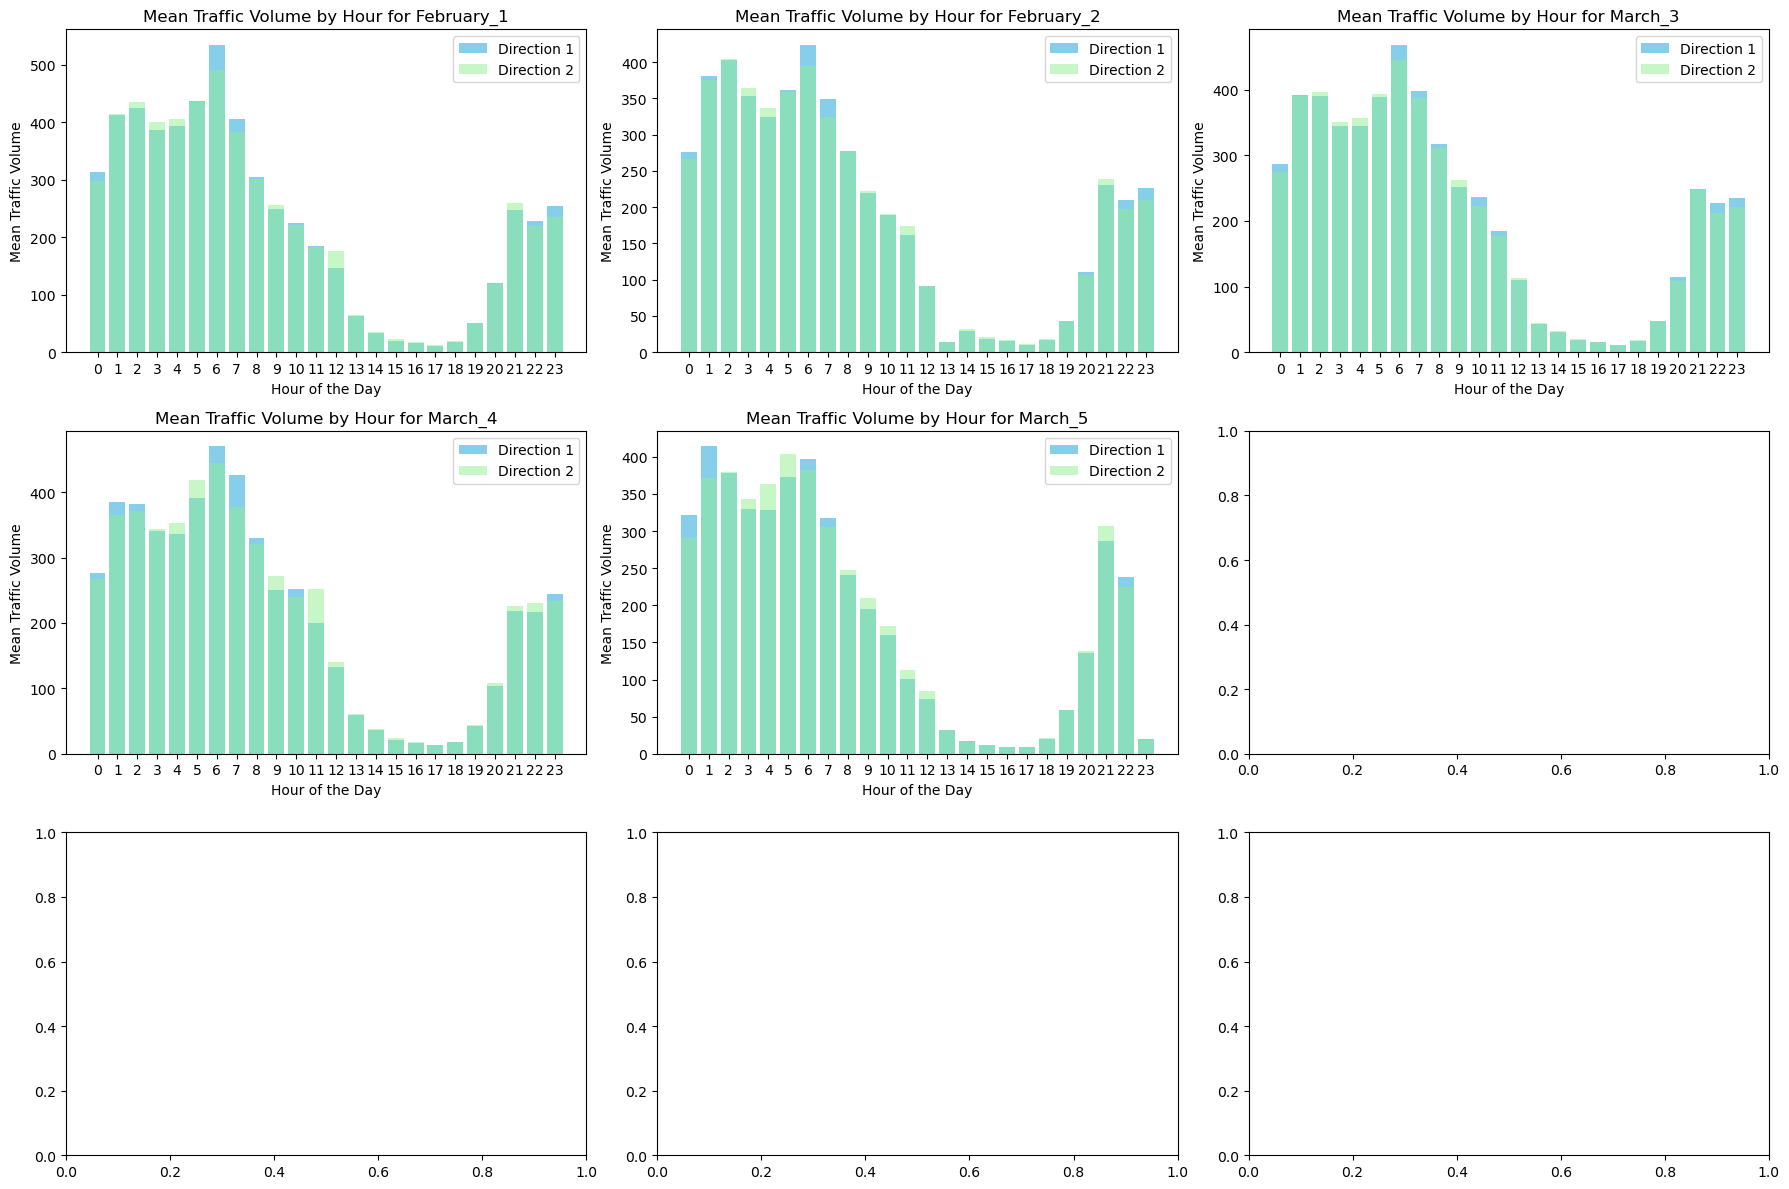

In [417]:
import matplotlib.pyplot as plt

# Define the grid size for the subplots
rows, cols = (3, 3)
fig, axs = plt.subplots(rows, cols, figsize=(18, 12))  

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through each key in the DataFrame and plot the graphs
for i, (index, row) in enumerate(keys_df.iterrows()):
    week_key = row['Keys']
    
    # Convert 'timestamp' column to datetime format
    merged_dataframes[week_key]['timestamp'] = pd.to_datetime(merged_dataframes[week_key]['timestamp'])
    # Extract hour from timestamp
    merged_dataframes[week_key]['hour'] = merged_dataframes[week_key]['timestamp'].dt.hour
    # Group data by hour and calculate mean traffic volume for both directions
    hourly_traffic_dir1 = merged_dataframes[week_key].groupby('hour')['direction_1_x'].mean()
    hourly_traffic_dir2 = merged_dataframes[week_key].groupby('hour')['direction_2_x'].mean()

    # Check if we haven't exceeded the number of subplots
    if i < rows * cols:
        ax = axs[i]
        # Plot bar chart for direction 1 on the ith subplot
        ax.bar(hourly_traffic_dir1.index, hourly_traffic_dir1.values, color='skyblue', label='Direction 1')
        # Plot bar chart for direction 2 on the ith subplot
        ax.bar(hourly_traffic_dir2.index, hourly_traffic_dir2.values, color='lightgreen', alpha=0.5, label='Direction 2')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Mean Traffic Volume')
        ax.set_title(f'Mean Traffic Volume by Hour for {week_key}')
        ax.legend()
        ax.set_xticks(hourly_traffic_dir1.index)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


## Mean Traffic Volume with Rain for each hour

This code snippet processes and visualizes pedestrian traffic volume and rainfall data on an hourly basis for a specific week (`week_key`). It first converts timestamps to datetime format and extracts hours to group the data, calculating mean traffic volumes and rainfall for each hour. The visualization uses a dual-axis bar and line chart, with traffic volumes displayed as blue bars and rainfall represented by a red line. This setup enables a clear comparison to see how weather conditions, specifically rainfall, correlate with pedestrian traffic volumes throughout the day, providing valuable insights for urban planning and safety enhancements.

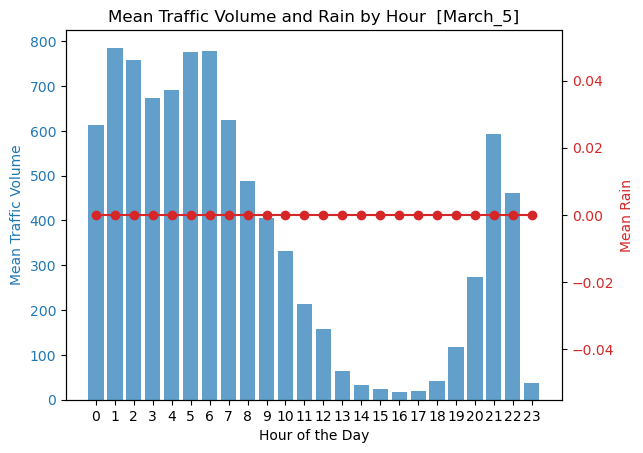

In [418]:

# Convert 'timestamp' column to datetime format
merged_dataframes[week_key]['timestamp'] = pd.to_datetime(merged_dataframes[week_key]['timestamp'])

# Extract hour from timestamp
merged_dataframes[week_key]['hour'] = merged_dataframes[week_key]['timestamp'].dt.hour

# Group data by hour and calculate mean traffic volume and mean rain
hourly_data = merged_dataframes[week_key].groupby('hour').agg({'total_of_directions': 'mean', 'rain': 'mean'})

# Plot bar chart
fig, ax1 = plt.subplots()

# Bar for traffic volume
color = 'tab:blue'
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Mean Traffic Volume', color=color)
ax1.bar(hourly_data.index, hourly_data['total_of_directions'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Create another y-axis for rain
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Mean Rain', color=color)
ax2.plot(hourly_data.index, hourly_data['rain'], color=color, linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Show plot
plt.title(f'Mean Traffic Volume and Rain by Hour  [{week_key}]')
plt.xticks(range(24))
plt.show()


## Mean Traffic Volume with weather variables for each hour and specific week

In [422]:
week_key = 'March_3'

This code enhances the visualization of pedestrian traffic data by incorporating multiple weather variables alongside traffic volume on an hourly basis for a specified week (`week_key`). After converting timestamps and extracting hours, it aggregates average values for traffic and weather-related metrics such as rain, temperature, humidity, precipitation, showers, and UV index. The visualization employs a dual-axis plot, with a bar chart for traffic volume on one axis and line graphs for the weather variables on the other. Each weather metric is represented in a different color, enhancing clarity and comparison. A legend is added for easy identification of each variable. This detailed visualization enables a comprehensive analysis of how various weather conditions correlate with pedestrian traffic volumes, offering valuable insights for urban safety and planning.

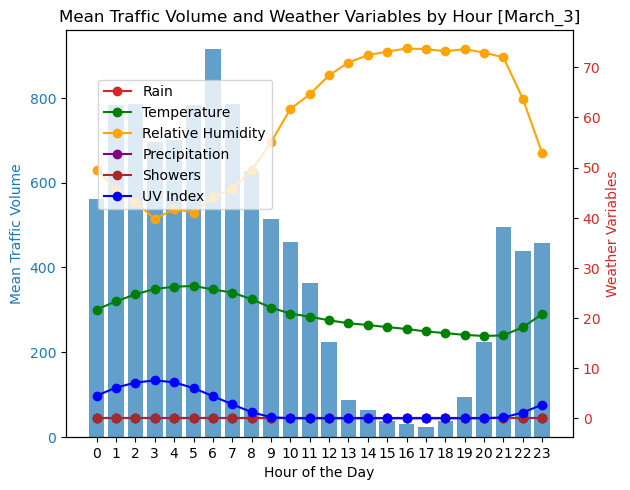

In [423]:

# Convert 'timestamp' column to datetime format
merged_dataframes[week_key]['timestamp'] = pd.to_datetime(merged_dataframes[week_key]['timestamp'])

# Extract hour from timestamp
merged_dataframes[week_key]['hour'] = merged_dataframes[week_key]['timestamp'].dt.hour

# Group data by hour and calculate mean traffic volume and mean weather variables
hourly_data = merged_dataframes[week_key].groupby('hour').agg({
    'total_of_directions': 'mean', 
    'rain': 'mean', 
    'temperature_2m': 'mean', 
    'relative_humidity_2m': 'mean', 
    'precipitation': 'mean', 
    'showers': 'mean', 
    'uv_index': 'mean'
})

# Plot bar chart
fig, ax1 = plt.subplots()

# Bar for traffic volume
color = 'tab:blue'
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Mean Traffic Volume', color=color)
ax1.bar(hourly_data.index, hourly_data['total_of_directions'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Create another y-axis for weather variables
ax2 = ax1.twinx()  

# Line plot for rain
color = 'tab:red'
ax2.set_ylabel('Weather Variables', color=color)
ax2.plot(hourly_data.index, hourly_data['rain'], color=color, linestyle='-', marker='o', label='Rain')
ax2.plot(hourly_data.index, hourly_data['temperature_2m'], color='green', linestyle='-', marker='o', label='Temperature')
ax2.plot(hourly_data.index, hourly_data['relative_humidity_2m'], color='orange', linestyle='-', marker='o', label='Relative Humidity')
ax2.plot(hourly_data.index, hourly_data['precipitation'], color='purple', linestyle='-', marker='o', label='Precipitation')
ax2.plot(hourly_data.index, hourly_data['showers'], color='brown', linestyle='-', marker='o', label='Showers')
ax2.plot(hourly_data.index, hourly_data['uv_index'], color='blue', linestyle='-', marker='o', label='UV Index')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.88))

# Show plot
plt.title(f'Mean Traffic Volume and Weather Variables by Hour [{week_key}]')
plt.xticks(range(24))
plt.show()


## Mean hourly precipitation

This code snippet visualizes the distribution of various weather conditions on an hourly basis for a specified week (`week_key`). It first extracts the hour from the timestamp for each entry and then analyzes several weather variables, including rain, precipitation, showers, UV index, temperature, and relative humidity. A 3x3 grid of subplots is set up, with each subplot dedicated to a different weather variable, displaying histograms of their mean hourly values. Each histogram is colored green and includes labels for the mean values and frequency, providing a clear visual representation of the typical hourly weather conditions. Unused subplot spaces are hidden to maintain a clean layout. This visualization is crucial for understanding the patterns and potential impacts of weather conditions on pedestrian dynamics, which can inform urban planning and safety strategies.

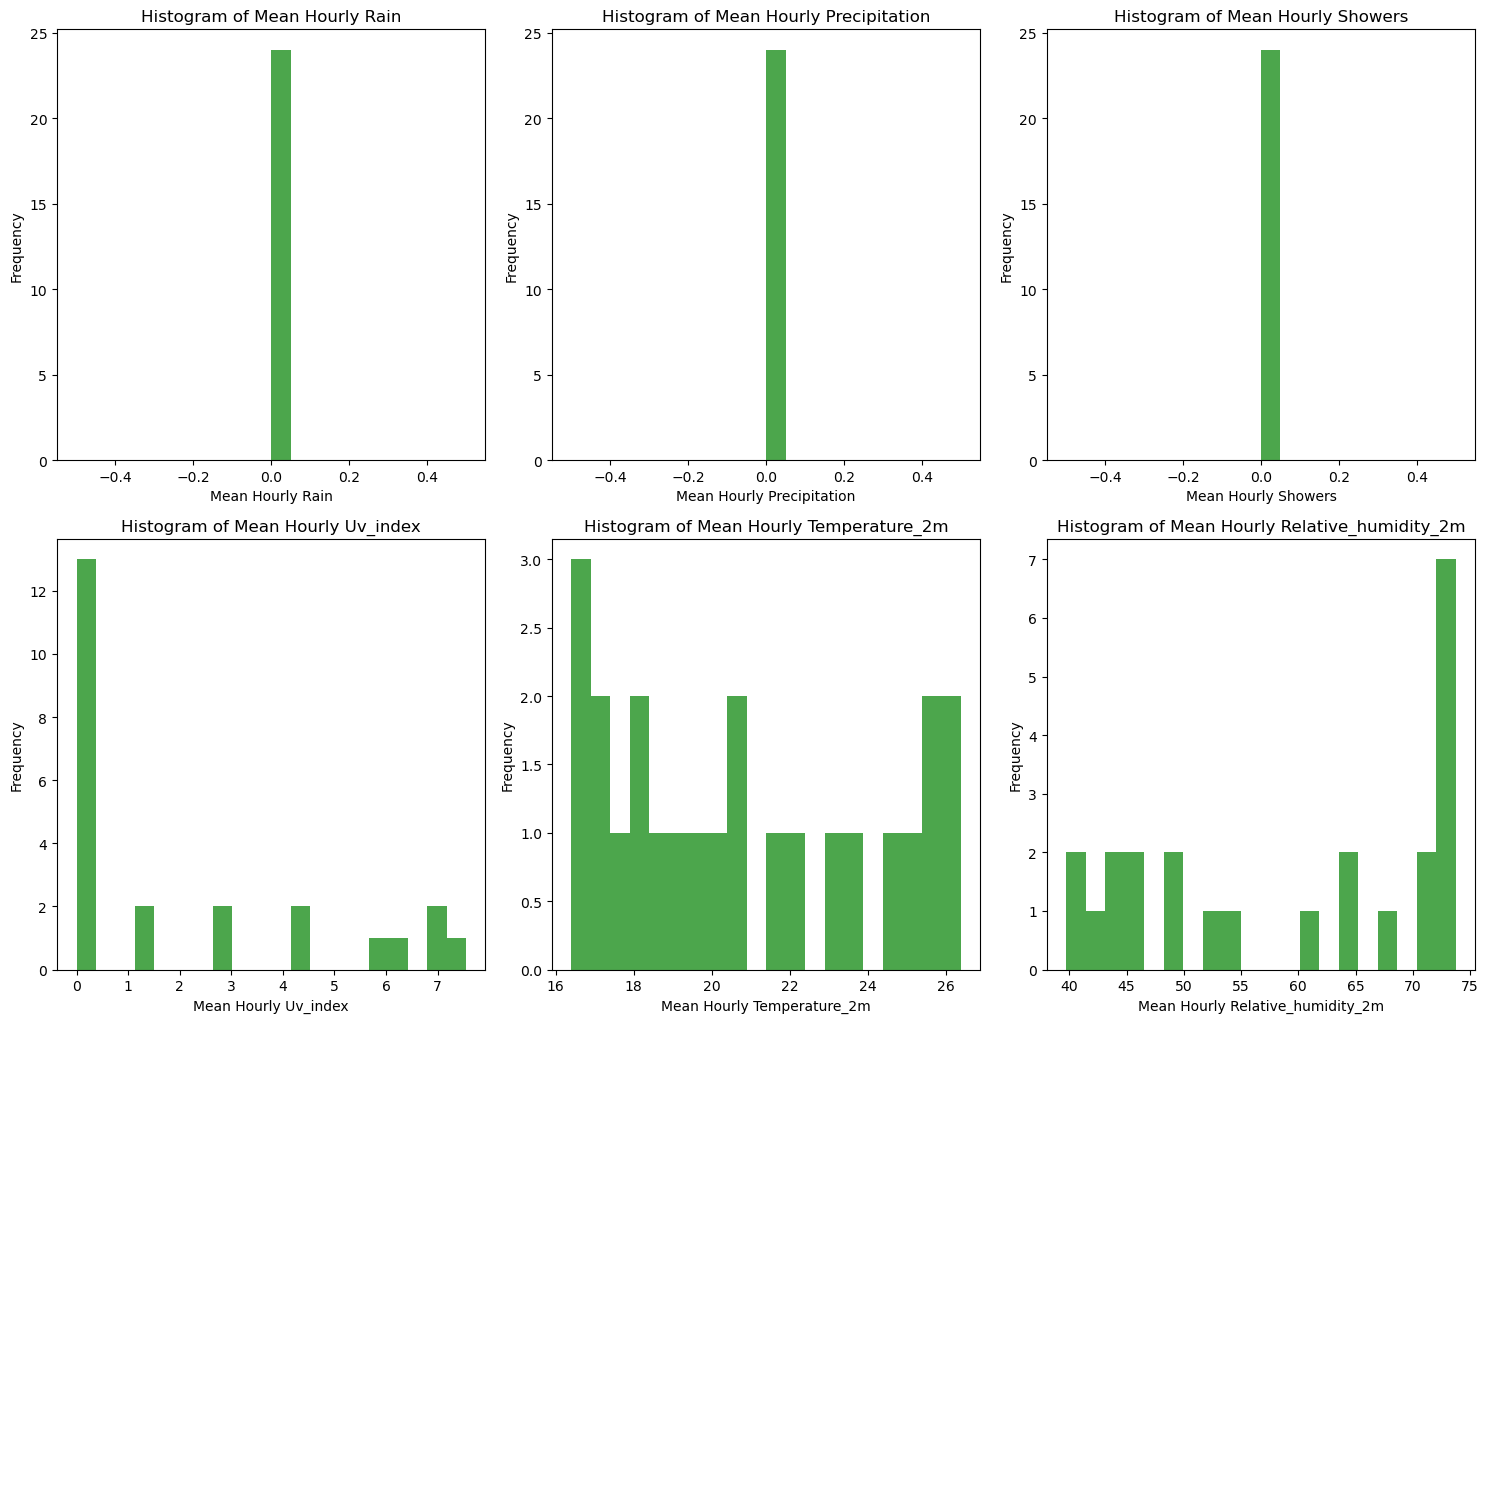

In [424]:
# Extract hour from timestamp
merged_dataframes[week_key]['hour'] = merged_dataframes[week_key]['timestamp'].dt.hour

# Define precipitation measures
precipitation_measures = ['rain', 'precipitation', 'showers','uv_index','temperature_2m','relative_humidity_2m'] 

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over precipitation measures
for i, measure in enumerate(precipitation_measures):
    # Group data by hour and calculate mean for the current precipitation measure
    hourly_data = merged_dataframes[week_key].groupby('hour')[measure].mean()
    
    # Plot histogram of mean hourly precipitation
    axes[i].hist(hourly_data, bins=20, color='green', alpha=0.7)
    axes[i].set_xlabel(f'Mean Hourly {measure.capitalize()}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of Mean Hourly {measure.capitalize()}')

# Hide empty subplots (if any)
for ax in axes[len(precipitation_measures):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Traffic Volume with other features

This code snippet utilizes matplotlib to generate a series of scatter plots, each examining the relationship between pedestrian traffic volume and various weather conditions such as rain, UV index, and temperature. The function `plot_trend_line` is defined to calculate and plot a regression line for each scatter plot, providing a visual representation of the linear relationship and the strength of correlation (R² value). The plots are organized in a 3x3 grid, with each subplot corresponding to a different weather variable. Scatter plots are marked in red for visibility, with trend lines in blue and dashed style to distinguish them. Labels and titles are set for each axis and plot, respectively, enhancing readability. Unused subplot spaces are hidden to maintain a neat layout. This visualization is instrumental in identifying how different weather conditions impact traffic volume, aiding in more informed decision-making for urban planning and safety measures.

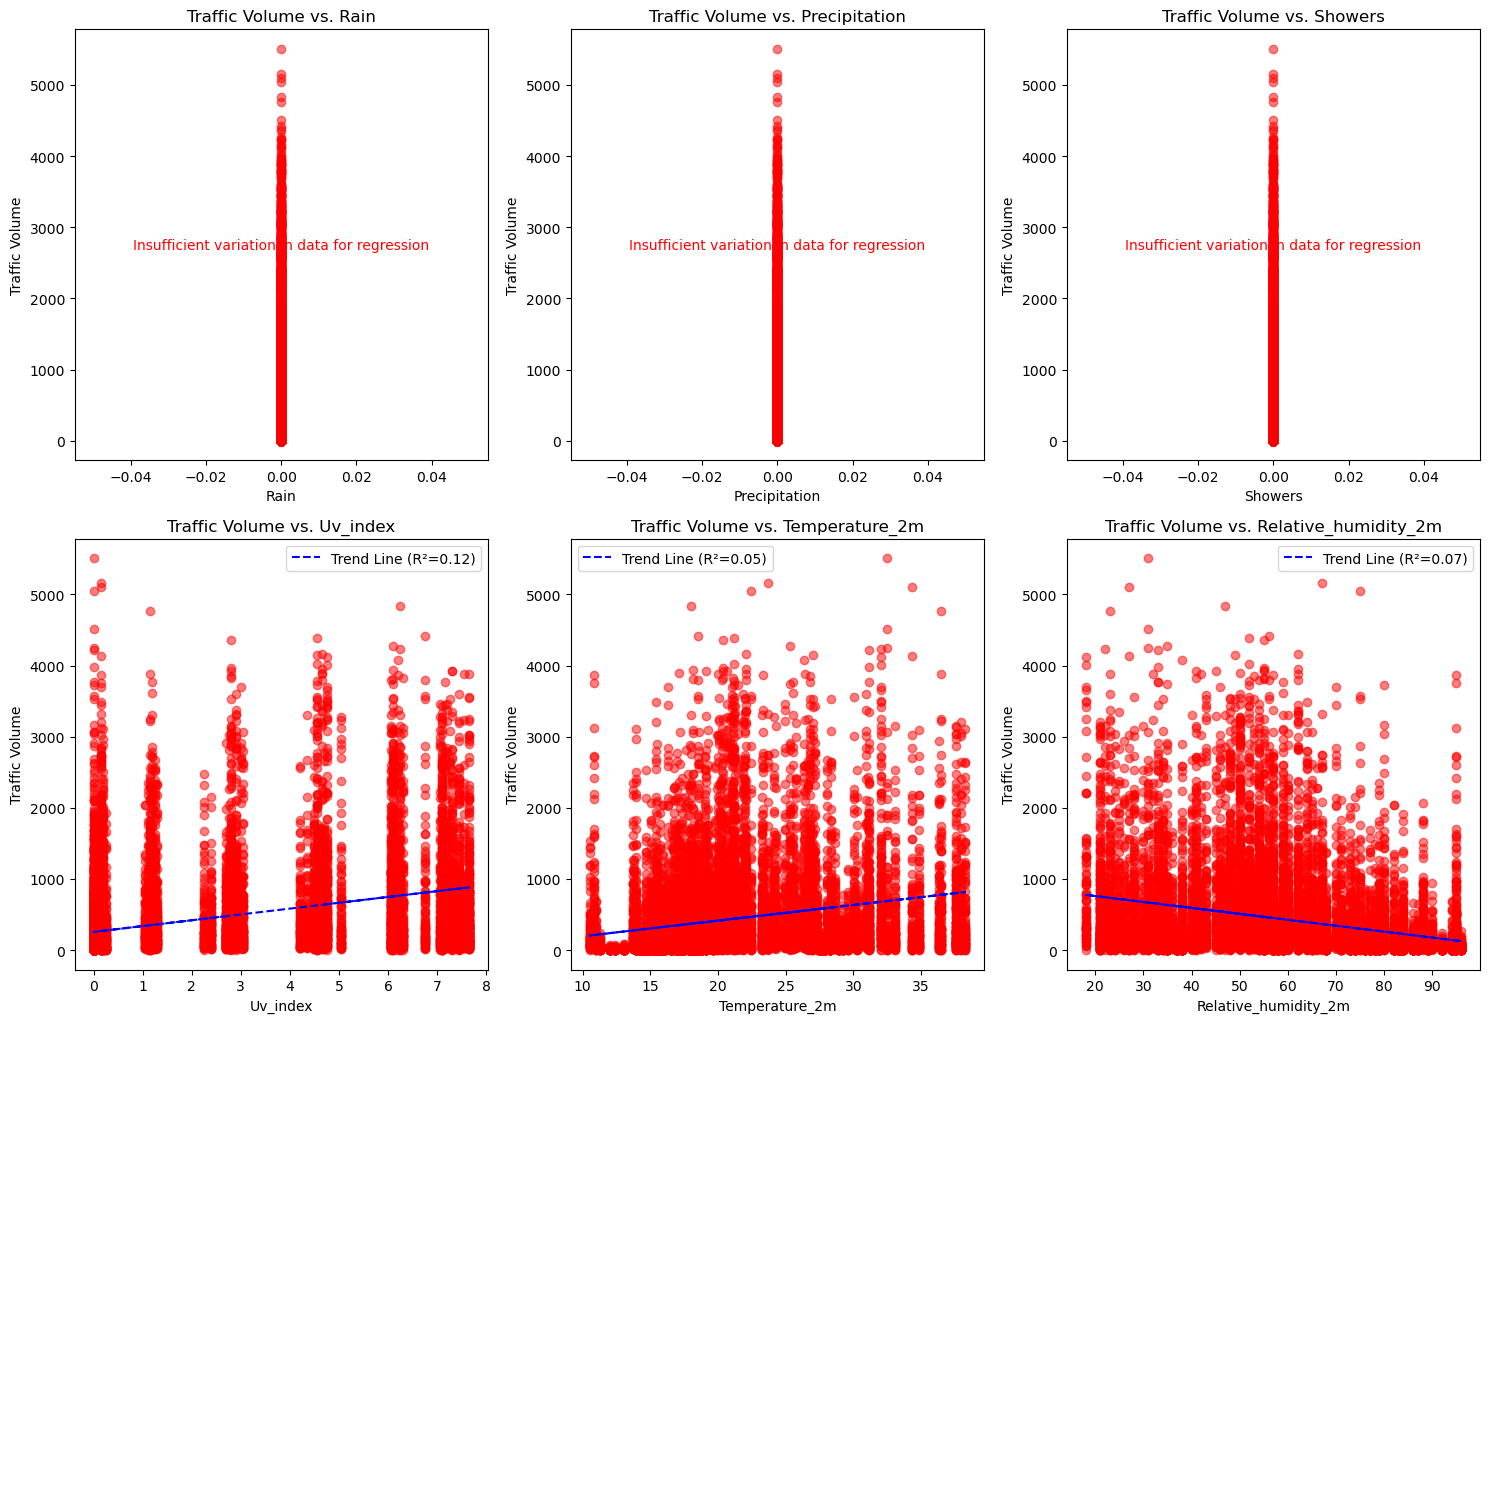

In [425]:

# Define function to calculate regression line

def plot_trend_line(x, y, ax):
    if len(np.unique(x)) > 1:
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        line = slope * x + intercept
        ax.plot(x, line, color='blue', linestyle='--', label=f'Trend Line (R²={r_value**2:.2f})')
        ax.legend()
    else:
        ax.text(0.5, 0.5, 'Insufficient variation in data for regression', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red')

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over precipitation measures
for i, measure in enumerate(precipitation_measures):
    # Scatter plot of traffic volume vs. the current precipitation measure
    axes[i].scatter(merged_dataframes[week_key][measure], merged_dataframes[week_key]['total_of_directions'], color='red', alpha=0.5)
    axes[i].set_xlabel(measure.capitalize())  # Set x-axis label
    axes[i].set_ylabel('Traffic Volume')  # Set y-axis label
    axes[i].set_title(f'Traffic Volume vs. {measure.capitalize()}')  # Set title
    
    # Calculate and plot trend line
    plot_trend_line(merged_dataframes[week_key][measure], merged_dataframes[week_key]['total_of_directions'], axes[i])

# Hide empty subplots (if any)
for ax in axes[len(precipitation_measures):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Combine all dfs into one

This code collects individual DataFrames for each week listed in `keys_df['Keys']` and appends them to a list. Each DataFrame is accessed by its corresponding key from the `merged_dataframes` dictionary. After gathering all the relevant DataFrames, they are concatenated into a single DataFrame `all_weeks_combined` along the rows (axis=0). Finally, the index of the combined DataFrame is reset to ensure it is clean and sequential, removing any old indices from the individual weekly DataFrames. This results in a unified DataFrame that encompasses all the data across different weeks, ready for further analysis or processing.

In [426]:
combined_dataframes_list = []

for key in keys_df['Keys']:
    # Append the correct dataframe for each key to the list
    combined_dataframes_list.append(merged_dataframes[key])

all_weeks_combined = pd.concat(combined_dataframes_list, axis=0)

# Reset the index of the combined dataframe
all_weeks_combined.reset_index(drop=True, inplace=True)
all_weeks_combined


,latitude,longitude,timestamp,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index,...,sensor_name_y,installation_date,note,location_type,status,direction_1_y,direction_2_y,location_y,date_only,hour
0,-37.818880,144.954492,2024-02-18 00:00:00+00:00,20.558500,60.0,0.0,0.0,0.0,2.0,5.20,...,Col620_T,2013-09-02,NaN,Outdoor,A,East,West,"-37.81887963, 144.95449198",2024-02-18,0
1,-37.818880,144.954492,2024-02-18 01:00:00+00:00,21.258501,58.0,0.0,0.0,0.0,2.0,6.75,...,Col620_T,2013-09-02,NaN,Outdoor,A,East,West,"-37.81887963, 144.95449198",2024-02-18,1
2,-37.818880,144.954492,2024-02-18 02:00:00+00:00,21.658501,57.0,0.0,0.0,0.0,2.0,7.85,...,Col620_T,2013-09-02,NaN,Outdoor,A,East,West,"-37.81887963, 144.95449198",2024-02-18,2
3,-37.818880,144.954492,2024-02-18 03:00:00+00:00,22.058500,55.0,0.0,0.0,0.0,1.0,8.25,...,Col620_T,2013-09-02,NaN,Outdoor,A,East,West,"-37.81887963, 144.95449198",2024-02-18,3
4,-37.818880,144.954492,2024-02-18 04:00:00+00:00,22.358500,55.0,0.0,0.0,0.0,1.0,7.95,...,Col620_T,2013-09-02,NaN,Outdoor,A,East,West,"-37.81887963, 144.95449198",2024-02-18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58619,-37.819973,144.958349,2024-03-18 10:00:00+00:00,27.558500,37.0,0.0,0.0,0.0,1.0,0.00,...,NaN,NaN,NaN,NaN,NaN,East,West,NaN,NaN,10
58620,-37.819973,144.958349,2024-03-18 11:00:00+00:00,26.208500,41.0,0.0,0.0,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,East,West,NaN,NaN,11
58621,-37.819973,144.958349,2024-03-18 12:00:00+00:00,24.708500,42.0,0.0,0.0,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,East,West,NaN,NaN,12
58622,-37.819973,144.958349,2024-03-18 13:00:00+00:00,22.908501,49.0,0.0,0.0,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,East,West,NaN,NaN,13


## Normalizing the columns

This code snippet first displays the data types of all columns in the `all_weeks_combined` DataFrame to ensure that the data types are appropriate for scaling. It then initializes a `MinMaxScaler`, which is used to normalize selected columns in the DataFrame. The columns chosen for normalization include traffic-related metrics and various weather variables such as temperature, humidity, and precipitation.

The normalization process scales these columns to a range of 0 to 1, which helps in handling disparities in measurement scales and improves the performance of many machine learning algorithms. The `fit_transform` method of the scaler adjusts the data based on the maximum and minimum values of each column, effectively scaling the data.

Finally, the transformed (scaled) data is printed, allowing you to see the normalized values, ensuring that all selected features now have a uniform scale without distorting differences in the ranges of values. This step is crucial for preparing the data for further analysis, especially when using algorithms that are sensitive to the scale of input data.

In [427]:


# Display the data types of all columns
print(all_weeks_combined.dtypes)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of columns to normalize
columns_to_normalize = ['total_of_directions', 'temperature_2m', 'relative_humidity_2m',
                        'precipitation', 'rain', 'showers', 'weather_code', 'uv_index']

# Fit the scaler on the data and transform it
all_weeks_combined[columns_to_normalize] = scaler.fit_transform(all_weeks_combined[columns_to_normalize])

# Print the scaled DataFrame
print(all_weeks_combined)


latitude                            float64
longitude                           float64
timestamp               datetime64[ns, UTC]
temperature_2m                      float32
relative_humidity_2m                float32
precipitation                       float32
rain                                float32
showers                             float32
weather_code                        float32
uv_index                            float32
sensor_name_x                        object
locationid                          float64
direction_1_x                       float64
direction_2_x                       float64
total_of_directions                 float64
location_x                           object
location_id                           int64
sensor_description                   object
sensor_name_y                        object
installation_date                    object
note                                 object
location_type                        object
status                          

## Check Unique Values

In [428]:
unique_values = all_weeks_combined['direction_1_y'].unique()
print(unique_values)
unique_values2 = all_weeks_combined['direction_2_y'].unique()
print(unique_values2)

['East' 'North']
['West' 'South']


In [429]:
# Display the data types of all columns
print(all_weeks_combined.dtypes)

latitude                            float64
longitude                           float64
timestamp               datetime64[ns, UTC]
temperature_2m                      float64
relative_humidity_2m                float64
precipitation                       float64
rain                                float64
showers                             float64
weather_code                        float64
uv_index                            float64
sensor_name_x                        object
locationid                          float64
direction_1_x                       float64
direction_2_x                       float64
total_of_directions                 float64
location_x                           object
location_id                           int64
sensor_description                   object
sensor_name_y                        object
installation_date                    object
note                                 object
location_type                        object
status                          

## One Hot Encorder for direction_1y and direction_2y

This code snippet initialises a `OneHotEncoder` to transform categorical data into a format that machine learning algorithms can more easily use. The encoder is set to produce a dense numpy array output. It first checks if the columns `direction_1_y` and `direction_2_y` exist in the `all_weeks_combined` DataFrame to prevent a KeyError during the encoding process.

If the columns are present, the encoder fits and transforms the data in these columns, converting the categorical variables into a series of binary columns, one for each category. It then retrieves the names of these new features, which reflect the original column names and their corresponding category values.

A new DataFrame, `encoded_df`, is created from the encoded data with these feature names as column headers. This encoded DataFrame is then concatenated with the original DataFrame, excluding the original categorical columns to avoid redundancy. The resulting DataFrame is printed to show the first few entries, allowing you to verify that the encoding was successful and the DataFrame now includes the newly encoded features.

This transformation is essential for preparing the data for machine learning models that require numerical input, ensuring that categorical attributes like directions are appropriately represented.

In [430]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # sparse=False ensures output is a numpy array

# Check if columns exist to avoid KeyError
if {'direction_1_y', 'direction_2_y'}.issubset(all_weeks_combined.columns):
    # Fit and transform the data
    encoded_data = encoder.fit_transform(all_weeks_combined[['direction_1_y', 'direction_2_y']])
    
    # Get the feature names from the encoder
    encoded_feature_names = encoder.get_feature_names_out(['direction_1_y', 'direction_2_y'])
    
    # Create a DataFrame with the encoded data and the generated feature names
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)
    
    # Concatenate the encoded data back to the original DataFrame
    all_weeks_combined = pd.concat([all_weeks_combined.drop(['direction_1_y', 'direction_2_y'], axis=1), encoded_df], axis=1)
    print(all_weeks_combined.head())
else:
    print("Columns 'direction_1_y' or 'direction_2_y' are not found in the DataFrame.")


   latitude   longitude                 timestamp  temperature_2m  \
0 -37.81888  144.954492 2024-02-18 00:00:00+00:00        0.362162   
1 -37.81888  144.954492 2024-02-18 01:00:00+00:00        0.387387   
2 -37.81888  144.954492 2024-02-18 02:00:00+00:00        0.401802   
3 -37.81888  144.954492 2024-02-18 03:00:00+00:00        0.416216   
4 -37.81888  144.954492 2024-02-18 04:00:00+00:00        0.427027   

   relative_humidity_2m  precipitation  rain  showers  weather_code  uv_index  \
0              0.530864            0.0   0.0      0.0        0.0250  0.630303   
1              0.506173            0.0   0.0      0.0        0.0250  0.818182   
2              0.493827            0.0   0.0      0.0        0.0250  0.951515   
3              0.469136            0.0   0.0      0.0        0.0125  1.000000   
4              0.469136            0.0   0.0      0.0        0.0125  0.963636   

   ... note  location_type  status                  location_y   date_only  \
0  ...  NaN        O

E:\ANACONDA\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [431]:
print(all_weeks_combined.columns)  # This will list all column names in the DataFrame
all_weeks_combined

Index(['latitude', 'longitude', 'timestamp', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'rain', 'showers',
       'weather_code', 'uv_index', 'sensor_name_x', 'locationid',
       'direction_1_x', 'direction_2_x', 'total_of_directions', 'location_x',
       'location_id', 'sensor_description', 'sensor_name_y',
       'installation_date', 'note', 'location_type', 'status', 'location_y',
       'date_only', 'hour', 'direction_1_y_East', 'direction_1_y_North',
       'direction_2_y_South', 'direction_2_y_West'],
      dtype='object')


,latitude,longitude,timestamp,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index,...,note,location_type,status,location_y,date_only,hour,direction_1_y_East,direction_1_y_North,direction_2_y_South,direction_2_y_West
0,-37.818880,144.954492,2024-02-18 00:00:00+00:00,0.362162,0.530864,0.0,0.0,0.0,0.0250,0.630303,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-18,0,1.0,0.0,0.0,1.0
1,-37.818880,144.954492,2024-02-18 01:00:00+00:00,0.387387,0.506173,0.0,0.0,0.0,0.0250,0.818182,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-18,1,1.0,0.0,0.0,1.0
2,-37.818880,144.954492,2024-02-18 02:00:00+00:00,0.401802,0.493827,0.0,0.0,0.0,0.0250,0.951515,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-18,2,1.0,0.0,0.0,1.0
3,-37.818880,144.954492,2024-02-18 03:00:00+00:00,0.416216,0.469136,0.0,0.0,0.0,0.0125,1.000000,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-18,3,1.0,0.0,0.0,1.0
4,-37.818880,144.954492,2024-02-18 04:00:00+00:00,0.427027,0.469136,0.0,0.0,0.0,0.0125,0.963636,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-18,4,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58619,-37.819973,144.958349,2024-03-18 10:00:00+00:00,0.614414,0.246914,0.0,0.0,0.0,0.0125,0.000000,...,NaN,NaN,NaN,NaN,NaN,10,1.0,0.0,0.0,1.0
58620,-37.819973,144.958349,2024-03-18 11:00:00+00:00,0.565766,0.296296,0.0,0.0,0.0,0.0000,0.000000,...,NaN,NaN,NaN,NaN,NaN,11,1.0,0.0,0.0,1.0
58621,-37.819973,144.958349,2024-03-18 12:00:00+00:00,0.511712,0.308642,0.0,0.0,0.0,0.0000,0.000000,...,NaN,NaN,NaN,NaN,NaN,12,1.0,0.0,0.0,1.0
58622,-37.819973,144.958349,2024-03-18 13:00:00+00:00,0.446847,0.395062,0.0,0.0,0.0,0.0000,0.000000,...,NaN,NaN,NaN,NaN,NaN,13,1.0,0.0,0.0,1.0


In [432]:
print(all_weeks_combined.columns)


Index(['latitude', 'longitude', 'timestamp', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'rain', 'showers',
       'weather_code', 'uv_index', 'sensor_name_x', 'locationid',
       'direction_1_x', 'direction_2_x', 'total_of_directions', 'location_x',
       'location_id', 'sensor_description', 'sensor_name_y',
       'installation_date', 'note', 'location_type', 'status', 'location_y',
       'date_only', 'hour', 'direction_1_y_East', 'direction_1_y_North',
       'direction_2_y_South', 'direction_2_y_West'],
      dtype='object')


In [433]:
all_weeks_combined

,latitude,longitude,timestamp,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index,...,note,location_type,status,location_y,date_only,hour,direction_1_y_East,direction_1_y_North,direction_2_y_South,direction_2_y_West
0,-37.818880,144.954492,2024-02-18 00:00:00+00:00,0.362162,0.530864,0.0,0.0,0.0,0.0250,0.630303,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-18,0,1.0,0.0,0.0,1.0
1,-37.818880,144.954492,2024-02-18 01:00:00+00:00,0.387387,0.506173,0.0,0.0,0.0,0.0250,0.818182,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-18,1,1.0,0.0,0.0,1.0
2,-37.818880,144.954492,2024-02-18 02:00:00+00:00,0.401802,0.493827,0.0,0.0,0.0,0.0250,0.951515,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-18,2,1.0,0.0,0.0,1.0
3,-37.818880,144.954492,2024-02-18 03:00:00+00:00,0.416216,0.469136,0.0,0.0,0.0,0.0125,1.000000,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-18,3,1.0,0.0,0.0,1.0
4,-37.818880,144.954492,2024-02-18 04:00:00+00:00,0.427027,0.469136,0.0,0.0,0.0,0.0125,0.963636,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-18,4,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58619,-37.819973,144.958349,2024-03-18 10:00:00+00:00,0.614414,0.246914,0.0,0.0,0.0,0.0125,0.000000,...,NaN,NaN,NaN,NaN,NaN,10,1.0,0.0,0.0,1.0
58620,-37.819973,144.958349,2024-03-18 11:00:00+00:00,0.565766,0.296296,0.0,0.0,0.0,0.0000,0.000000,...,NaN,NaN,NaN,NaN,NaN,11,1.0,0.0,0.0,1.0
58621,-37.819973,144.958349,2024-03-18 12:00:00+00:00,0.511712,0.308642,0.0,0.0,0.0,0.0000,0.000000,...,NaN,NaN,NaN,NaN,NaN,12,1.0,0.0,0.0,1.0
58622,-37.819973,144.958349,2024-03-18 13:00:00+00:00,0.446847,0.395062,0.0,0.0,0.0,0.0000,0.000000,...,NaN,NaN,NaN,NaN,NaN,13,1.0,0.0,0.0,1.0


## Check correlation only weather features

In [434]:
selected_columns = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'showers', 'uv_index']  
correlation_matrix2 = all_weeks_combined[selected_columns].corr()

# Display the correlation matrix
correlation_matrix2

,temperature_2m,relative_humidity_2m,precipitation,showers,uv_index
temperature_2m,1.000000,-0.856290,-0.046038,-0.026298,0.488869
relative_humidity_2m,-0.856290,1.000000,0.094917,0.070250,-0.572709
precipitation,-0.046038,0.094917,1.000000,0.845909,-0.073023
showers,-0.026298,0.070250,0.845909,1.000000,-0.064013
uv_index,0.488869,-0.572709,-0.073023,-0.064013,1.000000


## Correlation Map for weather features only 

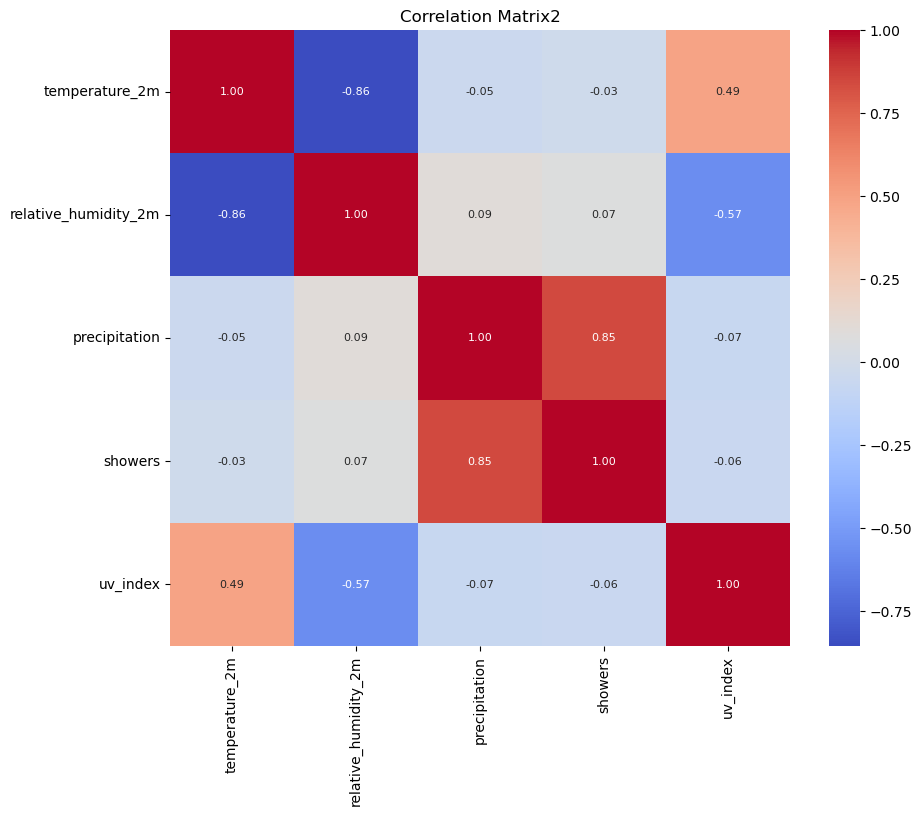

In [435]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"size": 8})
plt.title('Correlation Matrix2')
plt.show()


## Check VIF for weather features to check multicollinearity

This code snippet is designed to evaluate multicollinearity among several predictors in the `all_weeks_combined` DataFrame, specifically focusing on weather-related variables such as temperature, UV index, showers, rain, and relative humidity. Here's a step-by-step breakdown of the process:

Selection of Predictors: The first step involves selecting specific columns from the DataFrame that are likely to be used as predictors in a regression model.

Adding a Constant: The `sm.add_constant` function is used to add a constant term to the predictor variables. This is necessary for models that require an intercept term, ensuring that the regression has a baseline to work from.
Calculating Variance Inflation Factor (VIF):
   - A new DataFrame `vif_data` is created to store the results.
   - The Variance Inflation Factor is calculated for each predictor using the `variance_inflation_factor` function from the `statsmodels` library. This function assesses how much the variance of an estimated regression coefficient increases if your predictors are correlated.
   - The VIF for each variable is computed within a list comprehension, iterating over each column's index in the `predictors` DataFrame.

Output: Finally, the VIF values along with the feature names are printed. VIF values greater than 10 typically suggest high multicollinearity, which may warrant further investigation or adjustments in the model, such as dropping variables or applying dimensionality reduction techniques.

This approach is crucial for ensuring that the regression model built on these predictors will be reliable and not unduly influenced by multicollinearity, thus maintaining the validity of statistical inferences drawn from the model.

In [436]:


# Assuming df is your dataframe with the predictors
predictors = all_weeks_combined[['temperature_2m',  'uv_index', 'showers', 'rain','relative_humidity_2m']]
# Add a constant term for intercept
predictors = sm.add_constant(predictors)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = predictors.columns

vif_data["VIF"] = [variance_inflation_factor(predictors.values, i)
                   for i in range(len(predictors.columns))]

print(vif_data)


                feature        VIF
0                 const  63.772426
1        temperature_2m   3.766890
2              uv_index   1.489396
3               showers   1.010325
4                  rain   1.004365
5  relative_humidity_2m   4.281349


## OLS Model with only weather Features 

The `perform_regression` function is designed to conduct a regression analysis on a dataset, using weather-related predictors like temperature, UV index, showers, and rain to predict pedestrian traffic volumes (`total_of_directions`). The process begins by splitting the data into training and testing sets, ensuring a robust model evaluation. It incorporates a constant for intercept in the model, employs the Ordinary Least Squares (OLS) method for regression, and outputs a detailed summary including regression coefficients, statistical tests, and diagnostics to assess model performance. Additionally, it calculates and displays the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) to evaluate the model's fit, aiding in the selection of an optimal model for predicting pedestrian traffic based on weather conditions.

In [437]:

def perform_regression(df):
    # Make sure to replace these with the actual columns from your dataframe
    X = df[['temperature_2m',  'uv_index', 'showers', 'rain']]
    y = df['total_of_directions']
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Adding a constant to the model for the intercept
    X_train_with_const = sm.add_constant(X_train)
    X_test_with_const = sm.add_constant(X_test)
    
    # Creating an OLS model with statsmodels
    model = sm.OLS(y_train, X_train_with_const).fit()
    
    # Output the summary of the model
    print(model.summary())
    
    # You can directly access AIC and BIC from the model object
    print(f'AIC: {model.aic}')
    print(f'BIC: {model.bic}')

# Assuming df is your dataframe with all necessary data
perform_regression(all_weeks_combined)

# Uncomment the last line and replace `df` with your actual dataframe variable when you run this.


                             OLS Regression Results                            
Dep. Variable:     total_of_directions   R-squared:                       0.124
Model:                             OLS   Adj. R-squared:                  0.124
Method:                  Least Squares   F-statistic:                     1660.
Date:                 Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                         20:03:24   Log-Likelihood:                 57986.
No. Observations:                46899   AIC:                        -1.160e+05
Df Residuals:                    46894   BIC:                        -1.159e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0258      0.0

## One-hot encode the location_id column

This code transforms the categorical `location_id` data in the `all_weeks_combined` DataFrame into dummy variables for use in numerical analysis and modeling. It uses `pd.get_dummies` to create a new DataFrame `location_dummies`, where each unique location ID is converted into a binary column prefixed with 'location'. These dummy variables are then appended to the original DataFrame using `pd.concat`, expanding it to include these new columns. The updated DataFrame's columns are then listed, allowing you to confirm that the dummy variables have been successfully integrated, which is crucial for subsequent data processing or modeling steps involving location-specific analyses.

In [438]:
location_dummies = pd.get_dummies(all_weeks_combined['location_id'], prefix='location')
all_weeks_combined = pd.concat([all_weeks_combined, location_dummies], axis=1)
all_weeks_combined.columns

Index(['latitude', 'longitude', 'timestamp', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'rain', 'showers',
       'weather_code', 'uv_index',
       ...
       'location_132', 'location_133', 'location_134', 'location_135',
       'location_136', 'location_137', 'location_139', 'location_140',
       'location_141', 'location_142'],
      dtype='object', length=116)

## Calculate the correlation matrix for the numerical columns of interest + Categorical location ID

The code snippet prepares to analyze the correlations between various weather-related variables in the `all_weeks_combined` DataFrame. Initially, it attempts to drop several columns related to timestamps and geographical coordinates to focus on relevant predictors for analysis. Although the code to select specific columns like 'temperature_2m' and 'relative_humidity_2m' for correlation analysis is commented out, the intention is to examine the relationships between these environmental factors. The correlation matrix is then computed for these selected variables, aiming to reveal how closely these variables are related, which can help in understanding their combined effects on pedestrian traffic patterns. This correlation analysis is crucial for identifying potential multicollinearity or for developing more informed models that predict pedestrian behavior based on weather conditions.

In [439]:
selected_data = all_weeks_combined.drop([ 'timestamp','longitude','latitude','direction_1_x',
       'direction_2_x', 'total_of_directions'], axis=1)
#selected_columns = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'rain', 'showers', 'uv_index']  
correlation_matrix = all_weeks_combined[selected_columns].corr()
#correlation_matrix = selected_data.corr()
# Display the correlation matrix
correlation_matrix


,temperature_2m,relative_humidity_2m,precipitation,showers,uv_index
temperature_2m,1.000000,-0.856290,-0.046038,-0.026298,0.488869
relative_humidity_2m,-0.856290,1.000000,0.094917,0.070250,-0.572709
precipitation,-0.046038,0.094917,1.000000,0.845909,-0.073023
showers,-0.026298,0.070250,0.845909,1.000000,-0.064013
uv_index,0.488869,-0.572709,-0.073023,-0.064013,1.000000


In [440]:
all_weeks_combined[  'total_of_directions']


0        0.116012
1        0.129619
2        0.127977
3        0.131848
4        0.149677
           ...   
58619    0.012903
58620    0.010674
58621    0.009971
58622    0.004927
58623    0.002229
Name: total_of_directions, Length: 58624, dtype: float64

In [441]:
all_weeks_combined.dtypes


latitude                            float64
longitude                           float64
timestamp               datetime64[ns, UTC]
temperature_2m                      float64
relative_humidity_2m                float64
                               ...         
location_137                           bool
location_139                           bool
location_140                           bool
location_141                           bool
location_142                           bool
Length: 116, dtype: object

In [442]:
all_weeks_combined = all_weeks_combined.drop([ 'sensor_name_x',   'location_x', 'location_id', 'sensor_description', 'sensor_name_y', 'installation_date', 'note', 'location_type', 'status', 'location_y', 'date_only', 'hour', 'direction_1_y_East', 'direction_1_y_North', 'direction_2_y_South', 'direction_2_y_West'], axis=1)
print(all_weeks_combined)


        latitude   longitude                 timestamp  temperature_2m  \
0     -37.818880  144.954492 2024-02-18 00:00:00+00:00        0.362162   
1     -37.818880  144.954492 2024-02-18 01:00:00+00:00        0.387387   
2     -37.818880  144.954492 2024-02-18 02:00:00+00:00        0.401802   
3     -37.818880  144.954492 2024-02-18 03:00:00+00:00        0.416216   
4     -37.818880  144.954492 2024-02-18 04:00:00+00:00        0.427027   
...          ...         ...                       ...             ...   
58619 -37.819973  144.958349 2024-03-18 10:00:00+00:00        0.614414   
58620 -37.819973  144.958349 2024-03-18 11:00:00+00:00        0.565766   
58621 -37.819973  144.958349 2024-03-18 12:00:00+00:00        0.511712   
58622 -37.819973  144.958349 2024-03-18 13:00:00+00:00        0.446847   
58623 -37.819973  144.958349 2024-03-18 14:00:00+00:00        0.410811   

       relative_humidity_2m  precipitation  rain  showers  weather_code  \
0                  0.530864         

This code defines a function `find_column_with_value` that searches for a specific value within the object-type columns of a DataFrame. The function iterates over each column, checking if any of the entries match the given value, `Que85_T`. If a match is found, it returns the name of the column containing the value. After defining the function, it is executed using the `all_weeks_combined` DataFrame. The result indicates whether the value 'Que85_T' is found and in which column. If the value is not found, it outputs a message stating that no column contains 'Que85_T'. This functionality is particularly useful for quickly identifying the presence and location of specific entries within large datasets, aiding in data verification or cleaning processes.

In [443]:

def find_column_with_value(df, value):
    for column in df.columns:
        if df[column].dtype == object:  # Check only object type columns to simplify
            if (df[column] == value).any():
                return column
    return None

# Call the function to find the column name
column_name = find_column_with_value(all_weeks_combined, 'Que85_T')
if column_name:
    print(f"'Que85_T' is found in the column: {column_name}")
else:
    print("No column contains 'Que85_T'")


No column contains 'Que85_T'


In [444]:
print(all_weeks_combined.columns.tolist())

['latitude', 'longitude', 'timestamp', 'temperature_2m', 'relative_humidity_2m', 'precipitation', 'rain', 'showers', 'weather_code', 'uv_index', 'locationid', 'direction_1_x', 'direction_2_x', 'total_of_directions', 'location_1', 'location_2', 'location_3', 'location_4', 'location_5', 'location_6', 'location_7', 'location_8', 'location_9', 'location_10', 'location_11', 'location_12', 'location_14', 'location_17', 'location_18', 'location_19', 'location_20', 'location_21', 'location_23', 'location_24', 'location_25', 'location_27', 'location_28', 'location_29', 'location_30', 'location_31', 'location_35', 'location_36', 'location_37', 'location_39', 'location_40', 'location_41', 'location_43', 'location_44', 'location_45', 'location_46', 'location_47', 'location_48', 'location_49', 'location_50', 'location_51', 'location_52', 'location_53', 'location_54', 'location_56', 'location_58', 'location_59', 'location_61', 'location_62', 'location_63', 'location_65', 'location_66', 'location_67'

## Model with weather features + locationid 

The `perform_regression` function is meticulously designed to conduct a linear regression analysis, focusing on predicting pedestrian traffic volumes based on various environmental and situational predictors within a data frame. Initially, the function removes any rows containing NaN values to ensure the data quality used in the analysis. It then selects the target variable `total_of_directions` and discards non-predictive columns, setting up the predictor dataset. The data is split into training and testing sets, with 80% used for training to fit the model and 20% reserved for testing to evaluate the model's performance. A linear regression model is then trained on the training data. After training, the model makes predictions on the testing set, and its performance is evaluated using Mean Squared Error (MSE) and R-squared (R²), which are printed to give insights into the model's accuracy and explanatory power. This process is essential for understanding the impact of variables like weather conditions on pedestrian traffic, helping to inform decision-making in urban planning and safety management.

In [445]:
def perform_regression(df):
    # Selecting the target variable and features
    #X = df[['temperature_2m', 'relative_humidity_2m', 'uv_index','showers','rain']]  
    # Mean Squared Error: 0.005115399601514251
    # R^2 Score: 0.1291088971360574

    df = df.dropna()  # Drops rows with any NaN values
    X = df.drop(['timestamp', 'longitude', 'latitude', 'direction_1_x', 'direction_2_x', 'total_of_directions'], axis=1)
    y = df['total_of_directions']

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")


# Call the function with your DataFrame
perform_regression(all_weeks_combined)  # Adjust parameters as needed based on the correlation results


Mean Squared Error: 0.0028091355387377405
R^2 Score: 0.5000277352054836


In [446]:
all_weeks_combined.columns

Index(['latitude', 'longitude', 'timestamp', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'rain', 'showers',
       'weather_code', 'uv_index', 'locationid', 'direction_1_x',
       'direction_2_x', 'total_of_directions', 'location_1', 'location_2',
       'location_3', 'location_4', 'location_5', 'location_6', 'location_7',
       'location_8', 'location_9', 'location_10', 'location_11', 'location_12',
       'location_14', 'location_17', 'location_18', 'location_19',
       'location_20', 'location_21', 'location_23', 'location_24',
       'location_25', 'location_27', 'location_28', 'location_29',
       'location_30', 'location_31', 'location_35', 'location_36',
       'location_37', 'location_39', 'location_40', 'location_41',
       'location_43', 'location_44', 'location_45', 'location_46',
       'location_47', 'location_48', 'location_49', 'location_50',
       'location_51', 'location_52', 'location_53', 'location_54',
       'location_56', 'location_58',

In [447]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import Ridge
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error

# def perform_advanced_regression(all_weeks_combined):
#     # Selecting the target variable and features
#     X = all_weeks_combined.drop(['timestamp', 'longitude', 'latitude', 'direction_1_x', 'direction_2_x', 'total_of_directions'], axis=1)
#     y = all_weeks_combined['total_of_directions']

#     # Adding polynomial features
#     poly_model = make_pipeline(PolynomialFeatures(2), Ridge())

#     # Cross-validation
#     scores = cross_val_score(poly_model, X, y, cv=5, scoring='r2')
#     print(f"Cross-validated R^2 scores: {scores}")
#     print(f"Average R^2 score: {scores.mean()}")

# # Call the function with your DataFrame
# perform_advanced_regression(all_weeks_combined)


In [448]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score

# def perform_random_forest_regression(df):
#     X = all_weeks_combined[['temperature_2m', ]]
#     y = all_weeks_combined['total_of_directions']
    
#     # Random Forest model
#     rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
#     # Fitting the model
#     rf_model.fit(X, y)
    
#     # Cross-validation
#     scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
#     print(f"Cross-validated R^2 scores: {scores}")
#     print(f"Average R^2 score: {scores.mean()}")

#     # Feature importance
#     importances = rf_model.feature_importances_
#     feature_names = X.columns
#     importance_dict = dict(zip(feature_names, importances))
#     print("Feature importances:", importance_dict)

# # Call the function
# perform_random_forest_regression(all_weeks_combined)


In [449]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import cross_val_score

# def perform_xgboost_regression(df):
#     X = dfall_weeks_combined[['temperature_2m', 'relative_humidity_2m', 'uv_index', 'showers', 'rain']]
#     y = all_weeks_combined['total_of_directions']

#     # XGBoost model
#     xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    
#     # Fitting the model
#     xgb_model.fit(X, y)
    
#     # Cross-validation
#     scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
#     print(f"Cross-validated R^2 scores: {scores}")
#     print(f"Average R^2 score: {scores.mean()}")

#     # Feature importance
#     importances = xgb_model.feature_importances_
#     feature_names = X.columns
#     importance_dict = dict(zip(feature_names, importances))
#     print("Feature importances:", importance_dict)

# # Call the function
# perform_xgboost_regression(all_weeks_combined)


# Footpath Steepness

## Map

The provided code snippet is designed to embed an interactive map into a Jupyter Notebook using HTML. It defines a string `html_code` that contains the HTML code for an iframe. This iframe links to a specific dataset hosted on the Melbourne data portal, displaying a map that highlights footpath steepness in the city. The map is set to display with specific dimensions: 1100 pixels wide and 600 pixels high, without any border around the frame. The last line of the code uses the `HTML` function from the IPython.display library to render this HTML content directly within the notebook. This functionality is particularly useful for integrating dynamic data visualizations directly into data analysis workflows, providing a visual context that complements the statistical analysis conducted in the notebook.

In [450]:
# Define the HTML code for the map
html_code = """
<iframe src="https://data.melbourne.vic.gov.au/explore/embed/dataset/footpath-steepness/map/?location=16,-37.81284,144.95249&basemap=mbs-7a7333" width="1100" height="600" frameborder="0"></iframe>
"""

# Display the map in the notebook
HTML(html_code)


In [451]:
print(footpath_steepness.dtypes)

geo_point_2d     object
geo_shape        object
grade1in        float64
gradepc         float64
segside          object
statusid        float64
asset_type       object
deltaz          float64
streetid        float64
mccid_int       float64
mcc_id            int64
address          object
rlmax           float64
rlmin           float64
distance        float64
dtype: object


In [452]:
footpath_steepness

,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance
0,"-37.823036142583945, 144.94866061456034","{""coordinates"": [[[[144.94865791889143, -37.82...",4.2,23.81,NaN,8.0,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43
1,"-37.79542957518662, 144.91714933764632","{""coordinates"": [[[[144.9171360775573, -37.795...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1534622,NaN,NaN,NaN,NaN
2,"-37.79544286753349, 144.9172426574227","{""coordinates"": [[[[144.917238930522, -37.7954...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1534622,NaN,NaN,NaN,NaN
3,"-37.79580169415494, 144.92075182140118","{""coordinates"": [[[144.92074176246658, -37.795...",35.1,2.85,NaN,NaN,Road Footway,0.23,NaN,NaN,1387592,NaN,2.78,2.55,8.07
4,"-37.79654832375531, 144.92328274904054","{""coordinates"": [[[[144.92328246984576, -37.79...",109.6,0.91,NaN,NaN,Road Footway,0.01,NaN,NaN,1387085,NaN,3.39,3.38,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33580,"-37.80166668168155, 144.94353746774505","{""coordinates"": [[[[144.94350389586447, -37.80...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1385182,NaN,NaN,NaN,NaN
33581,"-37.80169795826924, 144.9433029188373","{""coordinates"": [[[[144.9433008833934, -37.801...",NaN,NaN,NaN,4.0,Road Footway,NaN,2987.0,30333.0,1385189,Pl5230,NaN,NaN,NaN
33582,"-37.802241487751616, 144.9434698881252",NaN,23.3,4.30,NaN,NaN,Road Footway,2.20,NaN,NaN,1385334,NaN,15.15,12.95,51.21
33583,"-37.8024821678599, 144.94316039147643","{""coordinates"": [[[[144.94311328357037, -37.80...",20.2,4.94,NaN,NaN,Road Footway,1.00,NaN,NaN,1385191,NaN,15.95,14.95,20.25


## Import footpath steepness dataset as geojson file

The code snippet is designed to load geographic data from a GeoJSON file named 'footpath-steepness.geojson' into a GeoDataFrame using the GeoPandas library. This process begins with reading the file and storing its contents in a variable gdf. To better understand the dataset, the script prints the first few entries of the GeoDataFrame, providing a quick glance at the data structure, including spatial attributes and geometry. Following the initial inspection, the code visualizes the data by plotting it directly. This visual representation helps in assessing the spatial distribution of footpath steepness across the dataset, offering a clear, immediate understanding of the geographic characteristics present in the data.

                                        geo_point_2d geo_shape  grade1in  \
0  {'lon': 144.94866061456034, 'lat': -37.8230361...      None       4.2   
1  {'lon': 144.91714933764632, 'lat': -37.7954295...      None       NaN   
2  {'lon': 144.9172426574227, 'lat': -37.79544286...      None       NaN   
3  {'lon': 144.92075182140118, 'lat': -37.7958016...      None      35.1   
4  {'lon': 144.92328274904054, 'lat': -37.7965483...      None     109.6   

   gradepc segside statusid    asset_type  deltaz  streetid  mccid_int  \
0    23.81    None        8  Road Footway    6.77    3094.0    30821.0   
1      NaN    None     None  Road Footway     NaN       NaN        NaN   
2      NaN    None     None  Road Footway     NaN       NaN        NaN   
3     2.85    None     None  Road Footway    0.23       NaN        NaN   
4     0.91    None     None  Road Footway    0.01       NaN        NaN   

    mcc_id      address  rlmax  rlmin  distance  \
0  1388075  Yarra River   6.86   0.09     28.43

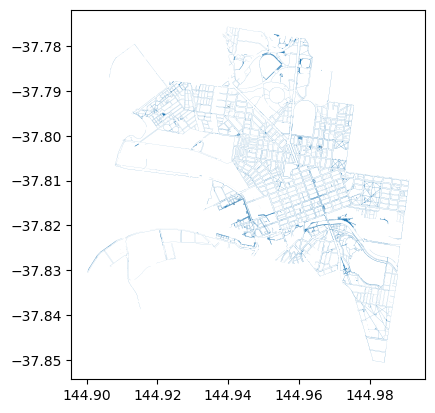

In [453]:
# Load the GeoJSON into a GeoDataFrame
gdf = gpd.read_file('footpath-steepness.geojson')

# Check the first few records to understand what the data looks like
print(gdf.head())

# Perform a quick plot to visualize
gdf.plot()

# Show the plot
plt.show()


In [454]:
gdf

,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance,geometry
0,"{'lon': 144.94866061456034, 'lat': -37.8230361...",None,4.2,23.81,None,8,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43,"MULTIPOLYGON (((144.94866 -37.82304, 144.94864..."
1,"{'lon': 144.91714933764632, 'lat': -37.7954295...",None,NaN,NaN,None,None,Road Footway,NaN,NaN,NaN,1534622,None,NaN,NaN,NaN,"MULTIPOLYGON (((144.91714 -37.79544, 144.91714..."
2,"{'lon': 144.9172426574227, 'lat': -37.79544286...",None,NaN,NaN,None,None,Road Footway,NaN,NaN,NaN,1534622,None,NaN,NaN,NaN,"MULTIPOLYGON (((144.91724 -37.79544, 144.91724..."
3,"{'lon': 144.92075182140118, 'lat': -37.7958016...",None,35.1,2.85,None,None,Road Footway,0.23,NaN,NaN,1387592,None,2.78,2.55,8.07,"POLYGON ((144.92074 -37.79579, 144.92086 -37.7..."
4,"{'lon': 144.92328274904054, 'lat': -37.7965483...",None,109.6,0.91,None,None,Road Footway,0.01,NaN,NaN,1387085,None,3.39,3.38,1.11,"MULTIPOLYGON (((144.92328 -37.79655, 144.92328..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33580,"{'lon': 144.94353746774505, 'lat': -37.8016666...",None,NaN,NaN,None,None,Road Footway,NaN,NaN,NaN,1385182,None,NaN,NaN,NaN,"MULTIPOLYGON (((144.94350 -37.80166, 144.94355..."
33581,"{'lon': 144.9433029188373, 'lat': -37.80169795...",None,NaN,NaN,None,4,Road Footway,NaN,2987.0,30333.0,1385189,Pl5230,NaN,NaN,NaN,"MULTIPOLYGON (((144.94330 -37.80170, 144.94331..."
33582,"{'lon': 144.9434698881252, 'lat': -37.80224148...",None,23.3,4.30,None,None,Road Footway,2.20,NaN,NaN,1385334,None,15.15,12.95,51.21,None
33583,"{'lon': 144.94316039147643, 'lat': -37.8024821...",None,20.2,4.94,None,None,Road Footway,1.00,NaN,NaN,1385191,None,15.95,14.95,20.25,"MULTIPOLYGON (((144.94311 -37.80248, 144.94325..."


## Clean dataset

In this code snippet, you are refining a GeoDataFrame `gdf` by removing rows that lack data across a specific subset of columns related to footpath steepness. The columns of interest include 'grade1in', 'gradepc', 'deltaz', 'rlmax', 'rlmin', and 'distance'. By using the `dropna` method with the `subset` parameter, the code efficiently discards any rows where all of these columns simultaneously have missing values. This operation helps ensure that the remaining data in `gdf_cleaned` maintains a minimum level of completeness necessary for reliable analysis or modeling. After cleaning the data, you display the first few rows of the cleaned DataFrame to check the results of this operation, confirming that the rows with complete data in the specified columns are retained. This step is crucial for preparing the data for more detailed geographical analysis or visualization tasks that require consistent data availability across these key metrics.

In [455]:
columns_to_check = ['grade1in', 'gradepc', 'deltaz', 'rlmax', 'rlmin', 'distance']

# Drop rows where all the specified columns are missing
gdf_cleaned = gdf.dropna(subset=columns_to_check, how='all')

# Display the first few rows of the cleaned DataFrame to verify the operation
gdf_cleaned

,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance,geometry
0,"{'lon': 144.94866061456034, 'lat': -37.8230361...",None,4.2,23.81,None,8,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43,"MULTIPOLYGON (((144.94866 -37.82304, 144.94864..."
3,"{'lon': 144.92075182140118, 'lat': -37.7958016...",None,35.1,2.85,None,None,Road Footway,0.23,NaN,NaN,1387592,None,2.78,2.55,8.07,"POLYGON ((144.92074 -37.79579, 144.92086 -37.7..."
4,"{'lon': 144.92328274904054, 'lat': -37.7965483...",None,109.6,0.91,None,None,Road Footway,0.01,NaN,NaN,1387085,None,3.39,3.38,1.11,"MULTIPOLYGON (((144.92328 -37.79655, 144.92328..."
5,"{'lon': 144.94832553398277, 'lat': -37.8235575...",None,4.2,23.81,None,8,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43,"MULTIPOLYGON (((144.94832 -37.82359, 144.94832..."
6,"{'lon': 144.94735216082958, 'lat': -37.8236801...",None,17.1,5.85,None,8,Road Footway,5.22,3094.0,30734.0,1450305,Yarra River,5.31,0.09,89.26,"MULTIPOLYGON (((144.94735 -37.82369, 144.94735..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33577,"{'lon': 144.94351752750893, 'lat': -37.8019853...",None,23.3,4.30,West,1,Road Footway,2.20,585.0,21044.0,1385334,Dryburgh Street between Queensberry Street and...,15.15,12.95,51.21,"MULTIPOLYGON (((144.94355 -37.80172, 144.94358..."
33579,"{'lon': 144.94306167406037, 'lat': -37.8012486...",None,22.2,4.51,None,None,Road Footway,0.96,NaN,NaN,1385212,None,8.52,7.56,21.29,"MULTIPOLYGON (((144.94303 -37.80134, 144.94308..."
33582,"{'lon': 144.9434698881252, 'lat': -37.80224148...",None,23.3,4.30,None,None,Road Footway,2.20,NaN,NaN,1385334,None,15.15,12.95,51.21,None
33583,"{'lon': 144.94316039147643, 'lat': -37.8024821...",None,20.2,4.94,None,None,Road Footway,1.00,NaN,NaN,1385191,None,15.95,14.95,20.25,"MULTIPOLYGON (((144.94311 -37.80248, 144.94325..."


## Check missing values

In [456]:

descriptive_stats = gdf_cleaned[['grade1in', 'gradepc']].describe()

# Identifying missing values
missing_values = gdf_cleaned[['grade1in', 'gradepc']].isnull().sum()

# Outputting the results
print(descriptive_stats)
print('-----------------')
print(missing_values)


            grade1in       gradepc
count   26288.000000  29130.000000
mean      304.567670      3.914951
std      5204.192189     13.849082
min         0.200000      0.000000
25%        23.500000      0.890000
50%        42.200000      2.100000
75%        83.300000      4.000000
max    288931.500000    580.470000
-----------------
grade1in    2842
gradepc        0
dtype: int64


In [457]:
print(gdf_cleaned.dtypes)

geo_point_2d      object
geo_shape         object
grade1in         float64
gradepc          float64
segside           object
statusid          object
asset_type        object
deltaz           float64
streetid         float64
mccid_int        float64
mcc_id             int64
address           object
rlmax            float64
rlmin            float64
distance         float64
geometry        geometry
dtype: object


## Distribution of grade Inclination + Percentage

This code snippet creates histograms to visualize the distribution of 'grade1in' and 'gradepc' values in the cleaned GeoDataFrame `gdf_cleaned`. Each attribute is plotted separately, with the first histogram showing the 'grade1in' values, which represent the incline of footpaths measured as '1 in X'. The second histogram displays the 'gradepc', which is the grade percentage. Both histograms are designed with 50 bins to detail the spread of values and are colored distinctly—sky blue for 'grade1in' and green for 'gradepc'. The histograms are framed with black edges for better visual distinction and labeled appropriately with titles, x-axis labels denoting the measurement units, and y-axis labels indicating the frequency of data points, providing a clear and informative visualization of the distribution characteristics of these footpath steepness measurements.

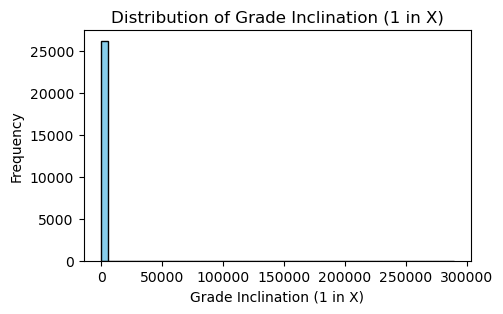

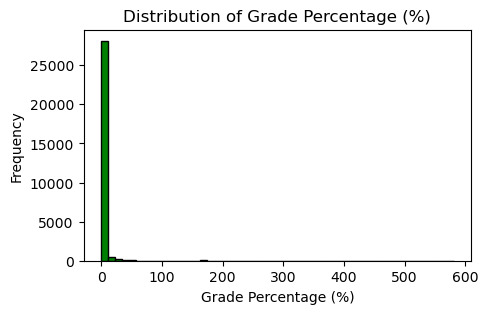

In [458]:
# Histogram for grade1in
plt.figure(figsize=(5, 3))
plt.hist(gdf_cleaned['grade1in'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Grade Inclination (1 in X)')
plt.xlabel('Grade Inclination (1 in X)')
plt.ylabel('Frequency')
plt.show()

# Histogram for gradepc
plt.figure(figsize=(5, 3))
plt.hist(gdf_cleaned['gradepc'].dropna(), bins=50, color='green', edgecolor='black')
plt.title('Distribution of Grade Percentage (%)')
plt.xlabel('Grade Percentage (%)')
plt.ylabel('Frequency')
plt.show()


## Grade Percentage vs Grade Inclination

This code snippet visualizes the relationship between two key variables in the cleaned GeoDataFrame `gdf_cleaned`: 'grade1in', which measures the grade inclination, and 'gradepc', which represents the grade percentage. Using a scatter plot, it effectively illustrates how these two measures of footpath steepness correlate with each other. The plot is configured with a size of 5x3 inches, and points are semi-transparent (alpha set at 0.5) to better display areas of density where data points overlap. The axes are clearly labeled with the respective units of measurement, and the plot is titled "Grade Percentage vs Grade Inclination" to provide immediate context. This visualization is valuable for assessing the consistency between different measures of grade and identifying any trends or anomalies in the data related to footpath steepness.

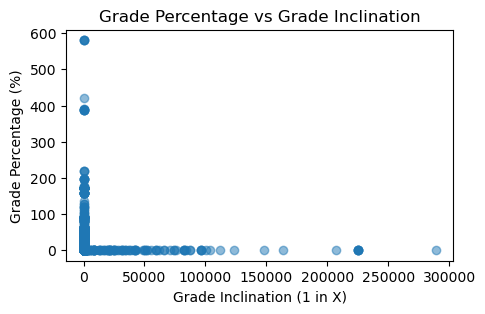

In [459]:
plt.figure(figsize=(5, 3))
plt.scatter(gdf_cleaned['grade1in'], gdf_cleaned['gradepc'], alpha=0.5)
plt.title('Grade Percentage vs Grade Inclination')
plt.xlabel('Grade Inclination (1 in X)')
plt.ylabel('Grade Percentage (%)')
plt.show()


## Steepness by grade percentage Map

In this code snippet, I am using the `geopandas` library to visualize geographic data from the `gdf_cleaned` GeoDataFrame, specifically focusing on the 'gradepc' column, which represents the grade percentage of footpaths. The plot is initialised with a figure size of 10x10 inches, providing ample space for detailed visualisation. The footpath data is then plotted using a colour scheme based on quantiles to differentiate areas by steepness effectively. This method divides the data into categories with an equal number of data points, which helps understand the distribution of steepness across the region.

The plot includes a legend with the title "Steepness by Grade Percentage (%)", positioned in the lower right of the plot, which aids in interpreting the colour scale. The axis labels are also turned off to emphasise the geographic visualisation without unnecessary distractions. This approach highlights spatial patterns in footpath steepness, offering insights into the topographical challenges within the area. The use of quantiles in colouring ensures that the steepness variations are clearly visible, making it an effective tool for urban planning and infrastructure analysis.

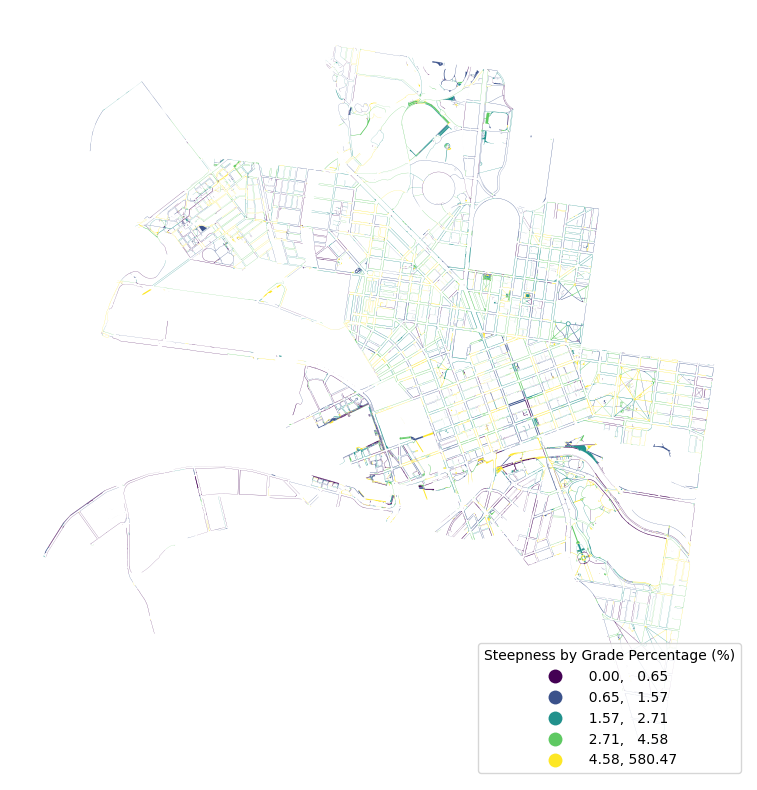

In [460]:
import geopandas as gpd
# Initialize the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the data
gdf_cleaned.plot(column='gradepc', scheme='quantiles', ax=ax, legend=True,
                 legend_kwds={'title': "Steepness by Grade Percentage (%)", 'loc': 'lower right'})

# Set the axis off
ax.set_axis_off()

# Show the plot
plt.show()


## Map with selected Area

In [461]:
gdf_cleaned

,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance,geometry
0,"{'lon': 144.94866061456034, 'lat': -37.8230361...",None,4.2,23.81,None,8,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43,"MULTIPOLYGON (((144.94866 -37.82304, 144.94864..."
3,"{'lon': 144.92075182140118, 'lat': -37.7958016...",None,35.1,2.85,None,None,Road Footway,0.23,NaN,NaN,1387592,None,2.78,2.55,8.07,"POLYGON ((144.92074 -37.79579, 144.92086 -37.7..."
4,"{'lon': 144.92328274904054, 'lat': -37.7965483...",None,109.6,0.91,None,None,Road Footway,0.01,NaN,NaN,1387085,None,3.39,3.38,1.11,"MULTIPOLYGON (((144.92328 -37.79655, 144.92328..."
5,"{'lon': 144.94832553398277, 'lat': -37.8235575...",None,4.2,23.81,None,8,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43,"MULTIPOLYGON (((144.94832 -37.82359, 144.94832..."
6,"{'lon': 144.94735216082958, 'lat': -37.8236801...",None,17.1,5.85,None,8,Road Footway,5.22,3094.0,30734.0,1450305,Yarra River,5.31,0.09,89.26,"MULTIPOLYGON (((144.94735 -37.82369, 144.94735..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33577,"{'lon': 144.94351752750893, 'lat': -37.8019853...",None,23.3,4.30,West,1,Road Footway,2.20,585.0,21044.0,1385334,Dryburgh Street between Queensberry Street and...,15.15,12.95,51.21,"MULTIPOLYGON (((144.94355 -37.80172, 144.94358..."
33579,"{'lon': 144.94306167406037, 'lat': -37.8012486...",None,22.2,4.51,None,None,Road Footway,0.96,NaN,NaN,1385212,None,8.52,7.56,21.29,"MULTIPOLYGON (((144.94303 -37.80134, 144.94308..."
33582,"{'lon': 144.9434698881252, 'lat': -37.80224148...",None,23.3,4.30,None,None,Road Footway,2.20,NaN,NaN,1385334,None,15.15,12.95,51.21,None
33583,"{'lon': 144.94316039147643, 'lat': -37.8024821...",None,20.2,4.94,None,None,Road Footway,1.00,NaN,NaN,1385191,None,15.95,14.95,20.25,"MULTIPOLYGON (((144.94311 -37.80248, 144.94325..."


This code snippet leverages the Folium library to visualize specific geographic data within a defined bounding box on an interactive map. Initially, it sets the bounds of the bounding box using specified latitude and longitude values and constructs a Polygon object to represent this area. A Folium map is then initialized, centered on the midpoint of these bounds, with a zoom level optimized for detailed viewing. The bounding box is visually outlined on the map using a red PolyLine. The code processes each row of a cleaned GeoDataFrame (gdf_cleaned), checking if the centroid of the geometric data falls within the bounding box. If it does, a marker is placed at the centroid's coordinates, which includes a popup displaying these coordinates. This method of visualization is particularly effective for detailed spatial analysis within a specific area, allowing for precise identification and display of data points relevant to urban planning or geographic studies.

In [462]:
import folium
from shapely.geometry import Polygon, Point

# Define bounds and create a bounding box polygon
bounds = [-37.825, -37.820, 144.95, 144.96]
bounding_box = Polygon([(bounds[2], bounds[0]), (bounds[3], bounds[0]), 
                        (bounds[3], bounds[1]), (bounds[2], bounds[1])])

# Create a map centered around the middle of the bounds
m = folium.Map(location=[(bounds[0] + bounds[1]) / 2, (bounds[2] + bounds[3]) / 2], zoom_start=16)

# Add the bounding box as a rectangle on the map
rectangle = [
    [bounds[0], bounds[2]],  # (min_lat, min_lon)
    [bounds[0], bounds[3]],  # (min_lat, max_lon)
    [bounds[1], bounds[3]],  # (max_lat, max_lon)
    [bounds[1], bounds[2]],  # (max_lat, min_lon)
    [bounds[0], bounds[2]]   # close the loop
]
folium.PolyLine(rectangle, color="red", weight=2).add_to(m)

# Process each row in the DataFrame
for idx, row in gdf_cleaned.iterrows():
    if row['geometry'] is not None:  # Check if geometry is not None
        geometry = row['geometry']
        centroid = geometry.centroid

        # Check if centroid is within the bounding box
        if bounding_box.contains(centroid):
            # Add a marker for the location within the bounding box
            folium.Marker([centroid.y, centroid.x],  # folium uses lat, lon order
                          popup=f"Coordinate: {centroid.y}, {centroid.x}").add_to(m)

m  # Display the map


This code snippet processes the gdf_cleaned GeoDataFrame by extracting latitude and longitude coordinates from a column named geo_point_2d, which presumably contains dictionary-like objects with 'lat' and 'lon' keys. The lambda function applied to each row of the geo_point_2d column retrieves these values individually for latitude and longitude, and assigns them to new columns in the GeoDataFrame named 'lat' and 'lon' respectively. This operation effectively separates the combined geographical coordinates into distinct latitude and longitude columns, simplifying further geographic analyses or visualizations that require these coordinates to be accessed separately. This step is crucial for enhancing the usability of the data, particularly when interfacing with geographic libraries or systems that expect separate latitude and longitude inputs.

In [463]:
gdf_cleaned['lat'] = gdf_cleaned['geo_point_2d'].apply(lambda x: x['lat'])
gdf_cleaned['lon'] = gdf_cleaned['geo_point_2d'].apply(lambda x: x['lon'])

E:\ANACONDA\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
E:\ANACONDA\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


## Extract geo points in selected area

This code snippet filters entries in the `gdf_cleaned` GeoDataFrame to include only those within a specified geographic bounding box defined by the `bounds` list. The filtering criteria ensure that only entries with latitude and longitude values lying between the defined minimum and maximum bounds are included in the resulting `visible_area_df` DataFrame. The bounds list contains latitude and longitude limits in the order of minimum latitude, maximum latitude, minimum longitude, and maximum longitude. After applying these conditions, the snippet outputs the number of entries that fall within the defined visible area by accessing the `shape` attribute of the DataFrame, which provides the count of rows (entries). This operation is essential for focusing analyses on specific geographic regions, ensuring that subsequent processes, analyses, or visualizations are restricted to the most relevant spatial data.

In [464]:
# Filter DataFrame
visible_area_df = gdf_cleaned[(gdf_cleaned['lat'] >= bounds[0]) & 
                              (gdf_cleaned['lat'] <= bounds[1]) &
                              (gdf_cleaned['lon'] >= bounds[2]) & 
                              (gdf_cleaned['lon'] <= bounds[3])]

# Show the number of rows filtered or any specific information
print("Number of entries in visible area:", visible_area_df.shape[0])


Number of entries in visible area: 620


## Use clustering method to findout the closest footpaths

This code performs a series of operations to analyze and cluster footpath data within a specific geographic area, using hierarchical clustering based on their coordinates to identify groups of closely located paths. Here’s how it works: The code first filters the `visible_area_df` DataFrame to include only those entries identified as 'Road Footway', thereby isolating footpaths. It then extracts the latitude and longitude coordinates and converts them into a NumPy array for distance calculations. Using the `pdist` function from the `scipy.spatial.distance` module, a condensed distance matrix is computed using the Euclidean metric, which measures the straight-line distance between points. Hierarchical clustering is performed on this distance matrix using the `linkage` method from `scipy.cluster.hierarchy`, with 'ward' method to minimize the variance within each cluster. To form distinct clusters, a distance threshold (`max_d`) is set, and the `fcluster` function creates flat clusters based on this threshold. The code then identifies the largest cluster and filters the footpaths to include only those within this cluster, limiting the result to the closest 100 paths if there are more available. This approach effectively groups footpaths that are geographically close to each other, facilitating targeted analysis or interventions in densely populated footpath regions.

In [465]:
# Filter to only include footpaths
footpaths = visible_area_df[visible_area_df['asset_type'] == 'Road Footway']

# Prepare coordinates for distance calculation
coords = footpaths[['lat', 'lon']].to_numpy()

# Calculate the condensed distance matrix
dist_condensed = pdist(coords, metric='euclidean')

# Perform hierarchical clustering
Z = linkage(dist_condensed, method='ward')

# Flat clusters: specify a threshold to form clusters
# The threshold can be adjusted based on the dataset to control the size of clusters
max_d = 10  # Adjust this threshold based on your specific needs
clusters = fcluster(Z, max_d, criterion='distance')

# Find the cluster with the closest 100 paths or adjust the selection based on the number of paths
cluster_labels, counts = np.unique(clusters, return_counts=True)
target_cluster_label = cluster_labels[np.argsort(-counts)[:1]]  # Getting the largest cluster

# Filter rows belonging to the target cluster and limit to 100 if there are more
closest_footpaths = footpaths[clusters == target_cluster_label[0]].head(100)

# Output the result
closest_footpaths

,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance,geometry,lat,lon
17,"{'lon': 144.95549103598663, 'lat': -37.8227391...",None,30.3,3.30,None,8,Road Footway,1.17,3094.0,30652.0,1556127,Yarra River,1.21,0.04,35.44,"MULTIPOLYGON (((144.95549 -37.82275, 144.95549...",-37.822739,144.955491
2376,"{'lon': 144.95899732368255, 'lat': -37.8244540...",None,266.6,0.38,East,1,Road Footway,0.03,1359.0,22181.0,1383619,Kings Way between City Road and Whiteman Street,0.80,0.77,8.02,"MULTIPOLYGON (((144.95882 -37.82432, 144.95881...",-37.824454,144.958997
2403,"{'lon': 144.9560415475575, 'lat': -37.82227416...",None,9.4,10.66,None,None,Road Footway,0.42,NaN,NaN,1467849,None,2.61,2.19,3.94,"MULTIPOLYGON (((144.95599 -37.82225, 144.95599...",-37.822274,144.956042
2414,"{'lon': 144.95276822153815, 'lat': -37.8217226...",None,NaN,0.00,North,2,Road Footway,0.00,636.0,22446.0,1434485,Flinders Street between Spencer Street and Wur...,3.20,3.20,0.00,"MULTIPOLYGON (((144.95275 -37.82174, 144.95274...",-37.821723,144.952768
2422,"{'lon': 144.95814849627496, 'lat': -37.8211688...",None,NaN,0.00,None,None,Road Footway,0.00,NaN,NaN,1467887,None,2.19,2.19,0.00,"MULTIPOLYGON (((144.95813 -37.82117, 144.95805...",-37.821169,144.958148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19228,"{'lon': 144.95669335805476, 'lat': -37.8249319...",None,100.3,1.00,None,1,Road Footway,0.23,0.0,22454.0,1383817,Intersection of Clarendon Street and Whiteman ...,1.24,1.01,23.07,"MULTIPOLYGON (((144.95667 -37.82493, 144.95671...",-37.824932,144.956693
19352,"{'lon': 144.9500359061619, 'lat': -37.82013621...",None,18.3,5.48,None,2,Road Footway,6.73,526.0,22819.0,1434559,Collins Street between Spencer Street and Batm...,8.80,2.07,122.88,"MULTIPOLYGON (((144.95004 -37.82016, 144.95001...",-37.820136,144.950036
19353,"{'lon': 144.9501328292289, 'lat': -37.82023581...",None,16.6,6.02,South,None,Road Footway,0.81,NaN,NaN,1434531,None,9.60,8.79,13.45,"MULTIPOLYGON (((144.95013 -37.82024, 144.95013...",-37.820236,144.950133
19354,"{'lon': 144.9502220534267, 'lat': -37.82028582...",None,16.6,6.02,None,2,Road Footway,0.81,526.0,22819.0,1434531,Collins Street between Spencer Street and Batm...,9.60,8.79,13.45,"MULTIPOLYGON (((144.95020 -37.82032, 144.95020...",-37.820286,144.950222


This code snippet efficiently generates an interactive map centered on the mean latitude and longitude of a cluster of closely located footpaths, aiming to visualize their distribution and individual characteristics. It begins by calculating the average coordinates of these footpaths, which are used to set the central point of the map for an optimal view. The map is created using Folium with a suitable zoom level to ensure detailed visibility. Each footpath in the cluster is marked on the map using a loop that places a marker at the respective geographic coordinates of each path. The markers are equipped with pop-ups that display the grade percentage of each footpath, formatted to two decimal places for precision. This format not only enhances the map's utility for spatial analysis but also provides valuable data on footpath steepness at a glance, which can be particularly useful for urban planning and pedestrian safety initiatives. The map is then displayed, offering an interactive tool for exploring the geographic layout and specific data points of the footpaths within the targeted cluster.

In [472]:
mean_lat = closest_footpaths['lat'].mean()
mean_lon = closest_footpaths['lon'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=16)  # You might adjust zoom_start as needed

# Loop through the DataFrame indices 
for idx in closest_footpaths.index:
    lat = closest_footpaths.loc[idx, 'lat']
    lon = closest_footpaths.loc[idx, 'lon']
    gradepc = closest_footpaths.loc[idx, 'gradepc']  

    # Create a marker for each location in the route
    folium.Marker(
        location=[lat, lon],
        popup=f"Grade PC: {gradepc:.2f}%",  # Format grade percent to 2 decimal places
        icon=folium.Icon(color="blue", icon="info-sign")  # Blue icon with info sign
    ).add_to(m)

# Display the map
m


This code snippet uses Folium to construct an interactive map centered on the average coordinates of a cluster of footpaths, effectively visualizing the path sequence and highlighting significant points. The map is initialized centered around the calculated mean latitude and longitude of the `closest_footpaths` DataFrame to ensure it focuses directly on the relevant area, with a zoom level of 14 for detailed observation. Markers are placed at the first and last points of the DataFrame, designated as the start and end points, and are distinguished by green and red icons, respectively. These markers display the grade percentage at each point, providing immediate data on the steepness at the start and end of the route. The paths between consecutive points are connected with blue lines, enhancing the visual representation of the route's continuity and direction. This setup not only aids in navigating through the path visually but also adds depth to the analysis of footpath connectivity and accessibility within the area, making it a valuable tool for urban planning and related studies.

In [473]:

# Create a map centered around the average coordinates of the points
map_center = [closest_footpaths['lat'].mean(), closest_footpaths['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=16)

# Assuming the first and last points in your DataFrame are the start and end points
start_point = closest_footpaths.iloc[0]
end_point = closest_footpaths.iloc[-1]

# Add markers for start and end points
folium.Marker(
    [start_point['lat'], start_point['lon']],
    popup='Start Point: {}'.format(start_point['gradepc']),
    icon=folium.Icon(color="green", icon="play")
).add_to(m)

folium.Marker(
    [end_point['lat'], end_point['lon']],
    popup='End Point: {}'.format(end_point['gradepc']),
    icon=folium.Icon(color="red", icon="stop")
).add_to(m)

# Connect the points with lines
for i in range(len(closest_footpaths) - 1):
    folium.PolyLine([
        [closest_footpaths.iloc[i]['lat'], closest_footpaths.iloc[i]['lon']],
        [closest_footpaths.iloc[i + 1]['lat'], closest_footpaths.iloc[i + 1]['lon']]
    ], color="blue").add_to(m)

# Display the map
m


#### Problems with the output

interactive map reveals some potential issues with the visual representation of footpath data in Melbourne. First, the clustering of lines near the central point suggests either a high concentration of footpaths in a very specific area or possibly overlapping data that could indicate errors in data entry or processing. The spread of the blue lines, representing the routes or connections between points, seems somewhat chaotic and could confuse users trying to interpret paths or patterns. Additionally, the markers for the start and end points, indicated by green and red icons, are closely positioned, which might suggest either a short route or an inaccurate depiction of the footpath extents. This concentration and apparent clutter could hinder the map's usability for effective navigation or planning without further refinement or clearer demarcation of distinct paths and important locations.

The problematic output in the visualization of the footpath steepness dataset can be attributed to several key issues related to data characteristics and processing methods:

Comprehensive Inclusion of Footpaths: The dataset includes every single footpath segment, which, while thorough, can lead to visual clutter and overlap when all segments are displayed simultaneously. This level of detail, although useful for exhaustive analysis, can obscure higher-level trends or patterns when not selectively filtered or aggregated.
Difficulty in Identifying Specific Streets: Due to the inclusion of all footpath segments without clear differentiation, it becomes challenging to distinguish individual streets or pathways. This can hinder efforts to focus on specific areas or to perform targeted analysis, especially in densely populated or complex urban layouts.
Route Calculation Complexity: The route calculations that include every part of the footpath complicate the understanding of the overall footpath network. When paths are calculated without considering logical or habitual pedestrian routes (like direct paths or commonly used routes), the resulting visual output can appear chaotic and less practical for real-world applications, such as urban planning or pedestrian traffic management.

Addressing these issues could involve applying more selective criteria for visualizing data, utilizing spatial hierarchies or clustering algorithms to simplify the presentation, or enhancing the map with interactive features that allow users to focus on specific layers or segments of interest. Such improvements would make the data more accessible and actionable for decision-makers and analysts looking to optimize urban spaces for pedestrian use.

## Use Networkx to find best route considering gradepc

In this code snippet, a graph is constructed using the NetworkX library to represent footpaths as nodes and the distances between them as weighted edges. Each node in the graph corresponds to a footpath, identified by its index, and contains attributes such as latitude, longitude, and grade percentage (`gradepc`). Edges between nodes are then added based on the Euclidean distance between each pair of footpaths, with weights calculated by adjusting the raw distance by the grade percentage of the starting node. Specifically, the weight is computed by dividing the distance by the normalized grade percentage (converted from percentage to a proportion), effectively incorporating the steepness of the path into the cost of travel between nodes. This model allows for the analysis of path connectivity under conditions influenced by physical geography, potentially useful for optimizing routing in urban planning or accessibility studies where elevation changes are a significant factor.

In [474]:
# Create a graph
G = nx.Graph()

# Add nodes
for i, row in closest_footpaths.iterrows():
    G.add_node(i, lat=row['lat'], lon=row['lon'], gradepc=row['gradepc'])

# Add edges with weights
for i in closest_footpaths.index:
    for j in closest_footpaths.index:
        if i != j:
            dist = euclidean([closest_footpaths.loc[i, 'lat'], closest_footpaths.loc[i, 'lon']], [closest_footpaths.loc[j, 'lat'], closest_footpaths.loc[j, 'lon']])
            weight = dist / (closest_footpaths.loc[i, 'gradepc'] / 100.0)  # Using gradepc as part of the weight calculation
            G.add_edge(i, j, weight=weight)


C:\Users\Dinuk Nadishan\AppData\Local\Temp\ipykernel_7684\1424890459.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  weight = dist / (closest_footpaths.loc[i, 'gradepc'] / 100.0)  # Using gradepc as part of the weight calculation


This code snippet is designed to verify the presence of specified start and end nodes in a graph constructed from footpath data and to find the shortest path between these nodes using weighted edges. The process begins by identifying the minimum and maximum indices from the `closest_footpaths` DataFrame, which are assumed to represent the start and end nodes of the route, respectively. It then checks whether both these nodes are present in the graph `G`. If both nodes are found, the code employs NetworkX's `shortest_path` function to calculate the shortest path between them, considering the edge weights that incorporate both distance and footpath grade percentage. This approach ensures that the path calculated takes into account not just the direct distance but also the effort required to traverse each segment, which is particularly useful in scenarios where terrain and elevation are critical factors. If either the start or end node is missing, the code raises a `ValueError`, alerting to the issue that not all intended points are included in the graph, which is crucial for ensuring the reliability of any route or network analysis performed with this data.

In [469]:
# Verify nodes are in the graph and find the shortest path
start_node = closest_footpaths.index.min()  # Assuming the first index is the start
end_node = closest_footpaths.index.max()  # Assuming the last index is the end

if start_node in G and end_node in G:
    path = nx.shortest_path(G, source=start_node, target=end_node, weight='weight')
else:
    raise ValueError("Start or end node not found in the graph.")


This code snippet utilizes Folium to create an interactive map showcasing the shortest path between nodes in a network of footpaths, with specific markers and lines highlighting the route. The map is initialized centered on the average latitude and longitude of the footpaths involved in the shortest path calculation, providing a focused view of the area of interest. Each node (footpath) along the path is marked on the map, with the starting node marked in green, the ending node in red, and all intermediate nodes in blue to distinguish the sequence of travel. Popup labels provide detailed information about each node, including its index and grade percentage, formatted for clarity. Lines connecting consecutive nodes are plotted to visually represent the path, with a red color to enhance visibility. This setup not only aids in visualizing the geographical layout of the shortest path but also enhances the user's ability to interact with the map to explore details about each footpath segment, making it an effective tool for urban planning, route optimization, or recreational trail mapping.

In [470]:
# Map initialization
m = folium.Map(location=[closest_footpaths['lat'].mean(), closest_footpaths['lon'].mean()], zoom_start=16)

# Plotting each point on the map
for idx in path:
    folium.Marker(
        [closest_footpaths.loc[idx, 'lat'], closest_footpaths.loc[idx, 'lon']],
        popup=f"Index: {idx}, Grad PC: {closest_footpaths.loc[idx, 'gradepc']:.2f}",
        icon=folium.Icon(color="blue" if idx not in [start_node, end_node] else "green" if idx == start_node else "red")
    ).add_to(m)

# Connecting points with lines
for i in range(len(path) - 1):
    folium.PolyLine([
        [closest_footpaths.loc[path[i], 'lat'], closest_footpaths.loc[path[i], 'lon']],
        [closest_footpaths.loc[path[i + 1], 'lat'], closest_footpaths.loc[path[i + 1], 'lon']],
    ], color="red").add_to(m)

# Display the map
m


# CODE DATABASE - The code snippets below are on test!

In [471]:
-----
#Remove above line!!!!!!!

SyntaxError: invalid syntax (1313283684.py, line 1)

In [ ]:
# Extract coordinates into separate columns
subset_gdf['lat'] = subset_gdf['geo_point_2d'].apply(lambda x: x['lat'])
subset_gdf['lon'] = subset_gdf['geo_point_2d'].apply(lambda x: x['lon'])

# Prepare the coordinates array
coords = subset_gdf[['lat', 'lon']]

# Calculate the Euclidean distance matrix
dist_matrix = cdist(coords, coords, metric='euclidean')

# Print the distance matrix
print(dist_matrix)


## Sort locations by gradepc

In [ ]:
max_gradepc = subset_gdf['gradepc'].max()
gradepc_weight = 1 / (subset_gdf['gradepc'] / max_gradepc)  # Normalized and inverted


In [ ]:
adjusted_dist_matrix = dist_matrix + np.outer(gradepc_weight, np.ones(len(gradepc_weight)))


In [ ]:
route = [0]  # start with the index of the first location

# Build the route by moving to the point with the lowest adjusted distance
for _ in range(1, len(coords)):
    last_visited = route[-1]
    # Set distances to already visited locations to infinity
    adjusted_dist_matrix[:, last_visited] = np.inf
    # Find the nearest unvisited location considering adjusted distance
    next_stop = np.argmin(adjusted_dist_matrix[last_visited])
    route.append(next_stop)

# Map to show the route
map_center = [subset_gdf['lat'].mean(), subset_gdf['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=14)


In [ ]:
for idx in route:
    lat = subset_gdf.iloc[idx]['lat']
    lon = subset_gdf.iloc[idx]['lon']
    gradepc = subset_gdf.iloc[idx]['gradepc']
    folium.Marker(
        location=[lat, lon],
        popup=f"Grad PC: {gradepc:.2f}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Display the route as lines on the map
for i in range(len(route)-1):
    folium.PolyLine([
        [subset_gdf.iloc[route[i]]['lat'], subset_gdf.iloc[route[i]]['lon']],
        [subset_gdf.iloc[route[i+1]]['lat'], subset_gdf.iloc[route[i+1]]['lon']]
    ], color="red").add_to(m)

m

In [ ]:
priority_indices = np.argsort(-subset_gdf['gradepc'])

In [ ]:
sorted_gdf = subset_gdf.iloc[priority_indices]
sorted_gdf

## Sorted route by actual DataFrame indices

In [ ]:
if isinstance(priority_indices, pd.Series):
    priority_indices = priority_indices.values

# Initialize route list with the starting point (using the first location as the start)
route = [priority_indices[0]]

# Iterate to build the route
for _ in range(1, len(priority_indices)):
    last_visited = route[-1]
    # Retrieve distances to the last visited location from the distance matrix
    distances_to_last_visited = dist_matrix[last_visited].copy()

    # Set distances to already visited locations to infinity
    distances_to_last_visited[route] = np.inf

    # Find the index of the minimum distance that's not infinity (i.e., unvisited)
    next_stop = np.argmin(distances_to_last_visited)
    
    # Append the next stop to the route
    route.append(next_stop)

# Convert route indices back to original DataFrame indices if necessary
route_indices = priority_indices[route]


sorted_route_gdf = sorted_gdf.iloc[route_indices]
print(sorted_route_gdf)

In [ ]:
map_center = [sorted_route_gdf['lat'].mean(), sorted_route_gdf['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=14)
m

## Display all sample footpaths

In [ ]:

for idx in route:
    # Access the location data by DataFrame index
    lat = sorted_route_gdf.iloc[idx]['lat']
    lon = sorted_route_gdf.iloc[idx]['lon']
    gradepc = sorted_route_gdf.iloc[idx]['gradepc']  # Assuming gradepc is directly a percentage value

    # Create a marker for each location in the route
    folium.Marker(
        location=[lat, lon],
        popup=f"Grade PC: {gradepc:.2f}%",  # Format grade percent to 2 decimal places
        icon=folium.Icon(color="blue", icon="info-sign")  # Blue icon with info sign
    ).add_to(m)

m


In [ ]:
## Suggesting best pathway

In [ ]:
# Display route as lines
for i in range(len(route)-1):
    folium.PolyLine([sorted_route_gdf.iloc[route[i]][['lat', 'lon']].values,
                     sorted_route_gdf.iloc[route[i+1]][['lat', 'lon']].values],
                    color="red").add_to(m)

Best_Route_Map=m
Best_Route_Map

In [ ]:
gdf_cl eaned

In [ ]:
traffic_gdf

## Spatial Join with Pedestrian Data

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Convert your DataFrame to a GeoDataFrame
traffic_gdf = gpd.GeoDataFrame(
    all_weeks_combined,
    geometry=gpd.points_from_xy(all_weeks_combined.longitude, all_weeks_combined.latitude),
    crs="EPSG:4326"  # Assuming your lat/long is in WGS84
)
# Perform a spatial join using the `predicate` parameter
joined_gdf = gpd.sjoin(traffic_gdf, gdf_cleaned, how="inner", predicate="intersects")

# Analyze the joined GeoDataFrame
# For example, you might summarize pedestrian counts by path steepness or asset type
summary_stats = joined_gdf.groupby('asset_type')['total_of_directions'].describe()
summary_stats

In [ ]:
joined_gdf.columns




In [ ]:
# Categorize steepness to make it more understandable
def categorize_steepness(grade_pc):
    if grade_pc < 2:
        return 'Gentle'
    elif grade_pc < 5:
        return 'Moderate'
    else:
        return 'Steep'

# Apply the categorization
joined_gdf['steepness_category'] = joined_gdf['gradepc'].apply(categorize_steepness)

# Sort the DataFrame by steepness percentage for recommendation
sorted_gdf = joined_gdf.sort_values(by='gradepc')

# If you need to filter out paths based on user preference for less steep paths:
less_steep_paths = sorted_gdf[sorted_gdf['steepness_category'] == 'Gentle']

# Display or utilize the sorted or filtered DataFrame as needed
print(sorted_gdf[['location_id', 'address', 'gradepc', 'steepness_category']])


In [ ]:
import numpy as np
import pandas as pd

# Assuming 'joined_gdf' is already loaded with the 'gradepc' column

# Select a subset of the DataFrame to reduce the size of the distance matrix
subset_gdf = joined_gdf.sample(n=100, random_state=1)  # Adjust the number to suit your needs or system capacity

# Normalize the steepness percentage for the subset
max_steepness = subset_gdf['gradepc'].max()
subset_gdf['normalized_steepness'] = subset_gdf['gradepc'] / max_steepness

# Create a distance matrix based on steepness for the subset
num_paths = len(subset_gdf)
distance_matrix = np.zeros((num_paths, num_paths))

for i in range(num_paths):
    for j in range(num_paths):
        # Calculate the absolute difference in normalized steepness between paths
        distance_matrix[i][j] = abs(subset_gdf.iloc[i]['normalized_steepness'] - subset_gdf.iloc[j]['normalized_steepness'])

# Optionally, print the matrix or parts of it to inspect
print(distance_matrix)


In [ ]:
subset_gdf['centroid'] = subset_gdf['geometry'].centroid
print(subset_gdf['centroid'].isnull().sum())
subset_gdf

In [ ]:
subset_gdf['location_id']

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of gradepc values
plt.hist(subset_gdf['gradepc'], bins=20)
plt.title('Distribution of Grade Percentages')
plt.xlabel('Grade Percentage')
plt.ylabel('Frequency')
plt.show()

# Also, check unique values
print("Unique steepness percentages:", subset_gdf['gradepc'].unique())


In [ ]:
import folium
import geopandas as gpd

# Assuming 'gdf_cleaned' is your GeoDataFrame with the 'gradepc' column

# Convert the GeoDataFrame to GeoJSON
gdf_geojson = gdf_cleaned.to_json()

# Create a Folium map object. Set the initial location to your data's centroid.
# Replace 'your_latitude' and 'your_longitude' with the actual coordinates.
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)

folium.GeoJson(
    gdf_geojson,
    name='Steepness by Grade Percentage',
    style_function=lambda feature: {
        'fillColor': 'green' if feature['properties']['gradepc'] < 5 
            else 'yellow' if 5 <= feature['properties']['gradepc'] < 10 
            else 'orange' if 10 <= feature['properties']['gradepc'] < 15 
            else 'red' if 15 <= feature['properties']['gradepc'] < 20 
            else 'darkred',
                      
        
       
        'weight': 0.5,
        'dashArray': '5, 5',
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(fields=['gradepc'], aliases=['Steepness %: '])
).add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Add a layer control panel to the map.
folium.LayerControl().add_to(m)

# Display the map
m
